<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/download_zip_naip_data_feb15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
install.packages(c('raster','sf','fasterize'))
install.packages("googledrive")
install.packages("devtools")
devtools:::install_github("gearslaboratory/gdalUtils")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Skipping 1 packages not available: rgdal



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmppQJj9f/remotesb41d70488a97/gearslaboratory-gdalUtils-8872aaf/DESCRIPTION’ ... OK
* preparing ‘gdalUtils’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘gdalUtils_2.0.3.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in i.p(...):
“installation of package ‘/tmp/RtmppQJj9f/fileb41d14eb4555/gdalUtils_2.0.3.2.tar.gz’ had non-zero exit status”


In [ ]:
library(raster)
library(sf)
library(fasterize)
library(magrittr)
library(googledrive)
library(parallel)
library(data.table)
library(stringr)

drive_auth(use_oob = TRUE, cache = FALSE)

In [63]:
install.packages("terra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(terra)

In [365]:
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)

In [9]:
dir.create("/content/workingfolder")
dir.create("/content/workingfolder/utm4")
dir.create("/content/workingfolder/utm5")

Warning message in dir.create("/content/workingfolder"):
“'/content/workingfolder' already exists”
Warning message in dir.create("/content/workingfolder/utm4"):
“'/content/workingfolder/utm4' already exists”
Warning message in dir.create("/content/workingfolder/utm5"):
“'/content/workingfolder/utm5' already exists”


In [10]:
# load utm5 fishnets
# https://drive.google.com/file/d/12HSKwZ4tjHA8QW4NtK945gja1RVvQjoB/view?usp=drive_link
drive_download(file = as_id("12HSKwZ4tjHA8QW4NtK945gja1RVvQjoB"),
path = "/content/workingfolder/utm5/lokoaka_kionakapahu.gpkg", overwrite = FALSE)

# https://drive.google.com/file/d//view?usp=drive_link
drive_download(file = as_id("12Edck1WIVhwrwAWIpSYHr3nNAPUlip03"),
path = "/content/workingfolder/utm5/pololu.gpkg", overwrite = FALSE)

# https://drive.google.com/file/d//view?usp=drive_link
drive_download(file = as_id("12F2EN0Ev_wa_X9L4rxj2vGleFjl8_Kmx"),
path = "/content/workingfolder/utm5/wainamu.gpkg", overwrite = FALSE)

# https://drive.google.com/file/d//view?usp=drive_link
drive_download(file = as_id("12JyZ5Alpk36Jdt9sym23cJPydg6Ro8IA"),
path = "/content/workingfolder/utm5/waipio.gpkg", overwrite = FALSE)


# load utm4 fishnets
# https://drive.google.com/file/d/11JFB55CAQldZ_G-7z-Zw-uhSMRWtHZik/view?usp=drive_link
drive_download(file = as_id("11JFB55CAQldZ_G-7z-Zw-uhSMRWtHZik"),
path = "/content/workingfolder/utm4/anahola.gpkg", overwrite = FALSE)



ERROR: [1m[33mError[39m in `drive_download()`:[22m
[1m[22m[33m![39m Local `path` already exists and overwrite is `FALSE`:
[36m•[39m [34m/content/workingfolder/utm5/lokoaka_kionakapahu.gpkg[39m


In [ ]:
# https://drive.google.com/drive/folders/1RjXItS-5s1It-oj69-WwN04hty7XDkBd?usp=drive_link
      # load utm4 fishnets

jp_folder = "1RjXItS-5s1It-oj69-WwN04hty7XDkBd"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/utm4/', i_dir$name[1])
      )
    })
  }

In [ ]:
# https://drive.google.com/drive/folders/1n2kuDAzBOti15EIRCYVr3v-xiGX6DI5E?usp=drive_link
      # load utm5 fishnets

jp_folder = "1n2kuDAzBOti15EIRCYVr3v-xiGX6DI5E"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/utm5/', i_dir$name[1])
      )
    })
  }

In [ ]:
dir.create("/content/workingfolder/ccap")
dir.create("/content/workingfolder/ccap/utm4")
dir.create("/content/workingfolder/ccap/utm5")

In [ ]:
# load the ccap, utm 4
# https://drive.google.com/drive/folders/14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv?usp=drive_link
jp_folder = "14fLGpMg2n9o6c8YmH4NSHc_ZQOC5MAuv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm4/', i_dir$name[1])
      )
    })
  }

In [ ]:
# load the ccap, utm 5
# https://drive.google.com/drive/folders/1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW?usp=drive_link
jp_folder = "1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/ccap/utm5/', i_dir$name[1])
      )
    })
  }


In [11]:
dir.create("/content/workingfolder/dem")
dir.create("/content/workingfolder/dem/utm4")
dir.create("/content/workingfolder/dem/utm5")

Warning message in dir.create("/content/workingfolder/dem"):
“'/content/workingfolder/dem' already exists”
Warning message in dir.create("/content/workingfolder/dem/utm4"):
“'/content/workingfolder/dem/utm4' already exists”
Warning message in dir.create("/content/workingfolder/dem/utm5"):
“'/content/workingfolder/dem/utm5' already exists”


In [ ]:
# load the dem, utm 4
# https://drive.google.com/drive/folders/15nbWHXZdDOZbt9gUuB9BUPeCXc2SoivB?usp=drive_link
jp_folder = "15nbWHXZdDOZbt9gUuB9BUPeCXc2SoivB"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/dem/utm4/', i_dir$name[1])
      )
    })
  }

In [ ]:
# load the dem, utm 5
# https://drive.google.com/drive/folders/1i69kpClo2wDtemgit45ay3oogQXReg62?usp=drive_link
jp_folder = "1i69kpClo2wDtemgit45ay3oogQXReg62"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/dem/utm5/', i_dir$name[1])
      )
    })
  }

In [ ]:
dir.create("/content/workingfolder/nlcd")
dir.create("/content/workingfolder/nlcd/utm4")
dir.create("/content/workingfolder/nlcd/utm5")

In [ ]:
# load the nlcd, utm 4
# https://drive.google.com/file/d/1KVtVRzV8j3cIhedykbEoBtHrwuB-RqwD/view?usp=drive_link
drive_download(file = as_id('1KVtVRzV8j3cIhedykbEoBtHrwuB-RqwD'), path =  '/content/workingfolder/nlcd/utm4/nlcd_utm4.tif', overwrite = FALSE)

In [ ]:
# load the nlcd, utm 4
# https://drive.google.com/file/d/155LX_Gle2Pdm1pJ19po5J-PJEjFlC0oT/view?usp=drive_link
drive_download(file = as_id('155LX_Gle2Pdm1pJ19po5J-PJEjFlC0oT'), path =  '/content/workingfolder/nlcd/utm5/nlcd_utm5.tif', overwrite = FALSE)

In [ ]:
dir.create("/content/workingfolder/nwi")
dir.create("/content/workingfolder/nwi/utm4")
dir.create("/content/workingfolder/nwi/utm5")

In [ ]:
# load the nwi, utm 4 WITH NUMERIC COLUMN
# https://drive.google.com/file/d/1ylMwqAV7AEZglnvOrTdPDSz5XJsUyHO-/view?usp=drive_link
drive_download(file = as_id('1ylMwqAV7AEZglnvOrTdPDSz5XJsUyHO-'), path =  '/content/workingfolder/nwi/utm4/nwi_utm4.gpkg', overwrite = FALSE)

In [ ]:
# load the nwi, utm 5 (this one does not have numberic column)
# https://drive.google.com/file/d/1qNqsskgMOSzMQ-2LdDaGulDXUjpaI3Jr/view?usp=drive_link
drive_download(file = as_id('1qNqsskgMOSzMQ-2LdDaGulDXUjpaI3Jr'), path =  '/content/workingfolder/nwi/utm5/nwi_utm5.gpkg', overwrite = FALSE)

Load the clip data into a different folder

In [ ]:
dir.create("/content/clipdata")
dir.create("/content/clipdata/utm4")
dir.create("/content/clipdata/utm5")

In [ ]:
dir.create("/content/clipdata/dem")
dir.create("/content/clipdata/dem/utm4")
dir.create("/content/clipdata/dem/utm5")

In [ ]:
# load the dem, utm 4
# https://drive.google.com/drive/folders/17c3PyF3dEqWYsmHQLX4eJLIH7vi8EuLv?usp=drive_link
jp_folder = "17c3PyF3dEqWYsmHQLX4eJLIH7vi8EuLv"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/clipdata/dem/utm4/', i_dir$name[1])
      )
    })
  }

In [ ]:
dir.create("/content/clipdata/ccap")
dir.create("/content/clipdata/ccap/utm4")
dir.create("/content/clipdata/ccap/utm5")

In [ ]:
# load the ccap, utm 4
# https://drive.google.com/drive/folders/1VNJN0e9RK9AyqVLMctOr3jkY_di_9fIx?usp=drive_link
jp_folder = "1VNJN0e9RK9AyqVLMctOr3jkY_di_9fIx"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/clipdata/ccap/utm4/', i_dir$name[1])
      )
    })
  }

In [ ]:
dir.create("/content/clipdata/nlcd")
dir.create("/content/clipdata/nlcd/utm4")
dir.create("/content/clipdata/nlcd/utm5")

In [ ]:
# https://drive.google.com/drive/folders/1aDvPpi3ak-mt5S_7SWLCdL43GiOhLqxm?usp=drive_link
jp_folder = "1aDvPpi3ak-mt5S_7SWLCdL43GiOhLqxm"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/clipdata/nlcd/utm4/', i_dir$name[1])
      )
    })
  }

In [ ]:
dir.create("/content/clipdata/nwi")
dir.create("/content/clipdata/nwi/utm4")
dir.create("/content/clipdata/nwi/utm5")

In [12]:
nwi_utm4 <- st_read("/content/workingfolder/nwi/utm4/nwi_utm4.gpkg")

Reading layer `nwi_wetlands' from data source 
  `/content/workingfolder/nwi/utm4/nwi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 10866 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 412977.7 ymin: 2263072 xmax: 820600.7 ymax: 2464465
Projected CRS: WGS 84 / UTM zone 4N


In [19]:
nwi_utm4$wetland_ty %>% unique

[1] "Estuarine and Marine Deepwater"    "Estuarine and Marine Wetland"     
[3] "Freshwater Emergent Wetland"       "Freshwater Forested/Shrub Wetland"
[5] "Freshwater Pond"                   "Riverine"                         
[7] "Lake"

In [14]:
nwi_utm5 <- st_read("/content/workingfolder/nwi/utm5/nwi_utm5.gpkg")

Reading layer `nwi_wetlands_hawaii' from data source 
  `/content/workingfolder/nwi/utm5/nwi_utm5.gpkg' using driver `GPKG'
Simple feature collection with 2105 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 173408.4 ymin: 2087445 xmax: 316047.8 ymax: 2249339
Projected CRS: WGS 84 / UTM zone 5N


In [16]:
nwi_utm5$wetland_ty %>% unique

[1] "Freshwater Pond"                   "Riverine"                         
[3] "Estuarine and Marine Wetland"      "Freshwater Emergent Wetland"      
[5] "Freshwater Forested/Shrub Wetland" "Estuarine and Marine Deepwater"   
[7] "Lake"

load the iamgery data

In [39]:
dir.create("/content/clipdata/naip")
dir.create("/content/clipdata/naip/utm4")
dir.create("/content/clipdata/naip/utm5")

In [ ]:
# Load the naip 2022 data
# THIS DATA IS ONLY 3 BANDS - SHOULD NOT USE THIS

# https://drive.google.com/drive/folders/1vJgeZx00E8AoqhsVnN9Dq7grpKiuYNlW?usp=drive_link
jp_folder = "1vJgeZx00E8AoqhsVnN9Dq7grpKiuYNlW"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/clipdata/naip/utm4/', i_dir$name[1])
      )
    })
  }

In [44]:
dir.create("/content/workingfolder/naip")
dir.create("/content/workingfolder/naip/utm4")
dir.create("/content/workingfolder/naip/utm5")

In [ ]:
# load the utm 4 naip tiles
# https://drive.google.com/drive/folders/1-08yCPufLF9TbgAjvs6eORE6wVOSh8TM?usp=drive_link

cl <- makeCluster(8)

jp_folder = "1-08yCPufLF9TbgAjvs6eORE6wVOSh8TM"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/naip/utm4/', i_dir$name[1])
      )
    })
  }

stopCluster(cl)

In [ ]:
# Load NAIP utm 5 image tiles
# https://drive.google.com/drive/folders/1-6sv35-cMTza4S3BXZySBhQ5bC08-alG?usp=drive_link
cl <- makeCluster(8)

jp_folder = "1-6sv35-cMTza4S3BXZySBhQ5bC08-alG"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/workingfolder/naip/utm5/', i_dir$name[1])
      )
    })
  }

stopCluster(cl)

In [48]:
dir.create("/content/clipdata/planet")
dir.create("/content/clipdata/planet/utm4")
dir.create("/content/clipdata/planet/utm5")

dir.create("/content/clipdata/planet/utm4/2018")
dir.create("/content/clipdata/planet/utm5/2018")

dir.create("/content/clipdata/planet/utm4/2019")
dir.create("/content/clipdata/planet/utm5/2019")

dir.create("/content/clipdata/planet/utm4/2020")
dir.create("/content/clipdata/planet/utm5/2020")

Warning message in dir.create("/content/clipdata/planet"):
“'/content/clipdata/planet' already exists”
Warning message in dir.create("/content/clipdata/planet/utm4"):
“'/content/clipdata/planet/utm4' already exists”
Warning message in dir.create("/content/clipdata/planet/utm5"):
“'/content/clipdata/planet/utm5' already exists”


In [ ]:
# Load the planet utm 4 image tiles (2018, 2019, 2020) they area not stacked for each aoi yet.

# https://drive.google.com/drive/folders/1LHQ7rqUHTD0tIKSAlrqvNtS5H4a6EGIx?usp=drive_link

cl <- makeCluster(8)

jp_folder = "1LHQ7rqUHTD0tIKSAlrqvNtS5H4a6EGIx"
folder_id = drive_get(as_id(jp_folder)) # get folder ID
print(folder_id) #print folder ID

# Find files in the folder
files = drive_ls(folder_id)

# Loop through directories and download files inside them
for (i in seq_along(files$name)) {
  i_dir <- files[i, ] # Select directory
    try({

      # Download files from the directory to the specified path
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/clipdata/planet/utm4/2018/', i_dir$name[1])
      )
    })
  }

stopCluster(cl)

# Stack Planet data! yay

In [58]:
dir.create("/content/export")
dir.create("/content/export/planet")
dir.create("/content/export/planet/utm4")
dir.create("/content/export/planet/utm4/2018")

In [54]:
anahola_stack <- stack("/content/clipdata/planet/utm4/2018/anahola_2018-01-12.tif",
"/content/clipdata/planet/utm4/2018/anahola_2018-02-20.tif",
"/content/clipdata/planet/utm4/2018/anahola_2018-08-19.tif",
"/content/clipdata/planet/utm4/2018/anahola_2018-12-05.tif")

In [57]:
anahola_stack

class      : RasterStack 
dimensions : 751, 918, 689418, 16  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 467439, 470193, 2447514, 2449767  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : anahola_2018.01.12_1.1, anahola_2018.01.12_1.2, anahola_2018.01.12_1.3, anahola_2018.01.12_1.4, anahola_2018.02.20_1.1, anahola_2018.02.20_1.2, anahola_2018.02.20_1.3, anahola_2018.02.20_1.4, anahola_2018.08.19_1.1, anahola_2018.08.19_1.2, anahola_2018.08.19_1.3, anahola_2018.08.19_1.4, anahola_2018.12.05_1.1, anahola_2018.12.05_1.2, anahola_2018.12.05_1.3, ... 


In [59]:
stack_export <- "/content/export/planet/utm4/2018/anahola_stack_2018.tif"

writeRaster(anahola_stack, filename=stack_export, format="GTiff", overwrite=TRUE)

end

In [ ]:
st_crs(nwi_utm4) # WGS 84 / UTM zone 4N
st_crs(nwi_utm5) # WGS 84 / UTM zone 5N

In [ ]:
anahola_fishnet <- st_read("/content/workingfolder/utm4/anahola.gpkg")

looking at the clip data

In [ ]:
st_crs(anahola_fishnet) # NAD83 / UTM zone 4N

In [27]:
anahola_ccap <- raster("/content/clipdata/ccap/utm4/anahola.tif")
anahola_ccap_crs <- proj4string(anahola_ccap)
anahola_ccap_crs # '+proj=utm +zone=4 +datum=NAD83 +units=m +no_defs'

In [ ]:
extent(anahola_fishnet)

In [ ]:
extent(anahola_ccap)

In [ ]:
anahola_dem <- raster ("/content/clipdata/dem/utm4/anahola.tif")
anahola_dem_crs <- proj4string(anahola_dem)
anahola_dem_crs # '+proj=longlat +datum=NAD83 +no_defs'

In [ ]:
extent(anahola_dem)

In [ ]:
anahola_nlcd <- raster ("/content/clipdata/nlcd/utm4/nlcd_anahola.tif")
anahola_nlcd_crs <- proj4string(anahola_nlcd)
anahola_nlcd_crs # '+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs'

In [ ]:
extent(anahola_nlcd)

In [ ]:
extent(anahola_stack)

In [69]:
anahola_crop_stack_to_fishnet <- rast(anahola_stack, ext(anahola_fishnet))

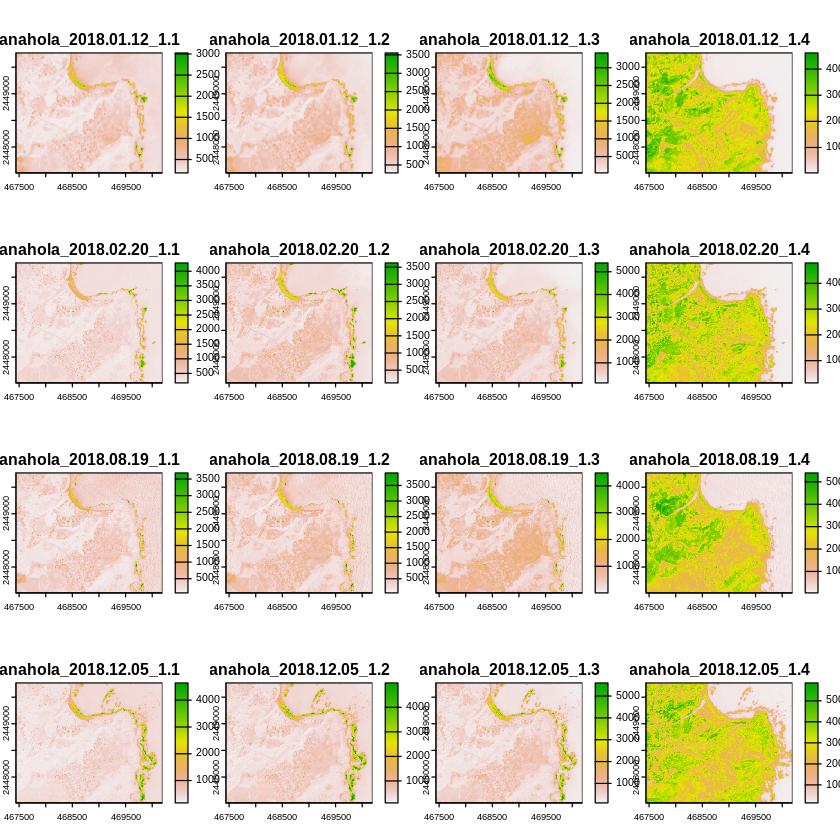

In [76]:
anahola_crop_stack_to_fishnet %>% plot

In [73]:
anahola_crop_ccap_to_fishnet <- rast(anahola_ccap, ext(anahola_fishnet))

class       : SpatRaster 
dimensions  : 936, 1146, 1  (nrow, ncol, nlyr)
resolution  : 2.4, 2.4  (x, y)
extent      : 467443.2, 470193.6, 2447516, 2449763  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=4 +datum=NAD83 +units=m +no_defs 
source      : anahola.tif 
color table : 1 
name        : Layer_1 

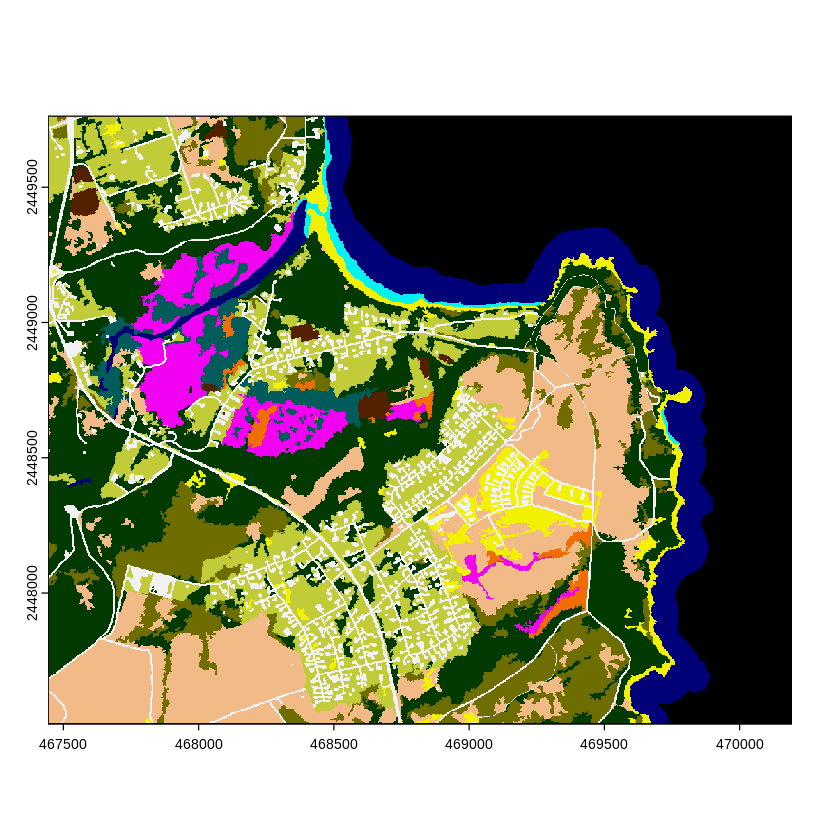

In [132]:
anahola_crop_ccap_to_fishnet
anahola_crop_ccap_to_fishnet %>% plot

In [77]:
anahola_crop_dem_to_fishnet <- rast(anahola_dem, ext(anahola_fishnet))

class       : SpatRaster 
dimensions  : 226, 297, 1  (nrow, ncol, nlyr)
resolution  : 8.983153e-05, 8.983153e-05  (x, y)
extent      : -159.3157, -159.289, 22.13247, 22.15277  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=NAD83 +no_defs 
source      : anahola.tif 
name        : elevation 

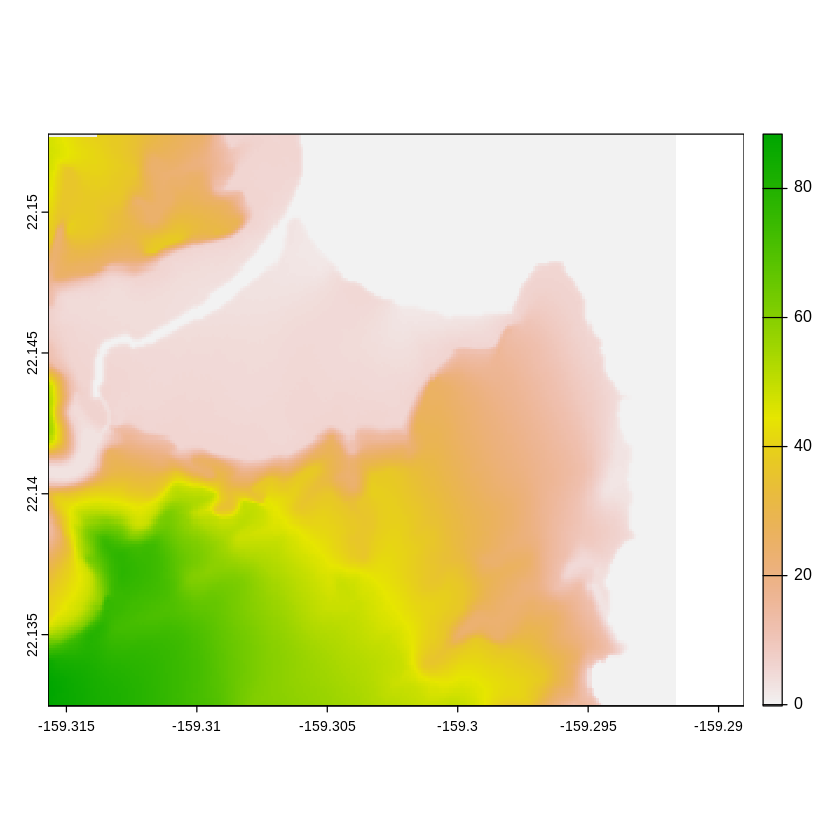

In [103]:
anahola_crop_dem_to_fishnet
anahola_crop_dem_to_fishnet %>% plot

In [79]:
anahola_crop_nlcd_to_fishnet <- rast(anahola_nlcd, ext(anahola_fishnet))

class       : SpatRaster 
dimensions  : 75, 92, 1  (nrow, ncol, nlyr)
resolution  : 29.92932, 29.98956  (x, y)
extent      : 467439.3, 470192.8, 2447515, 2449764  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source      : nlcd_anahola.tif 
color table : 1 
name        : nlcd_anahola 

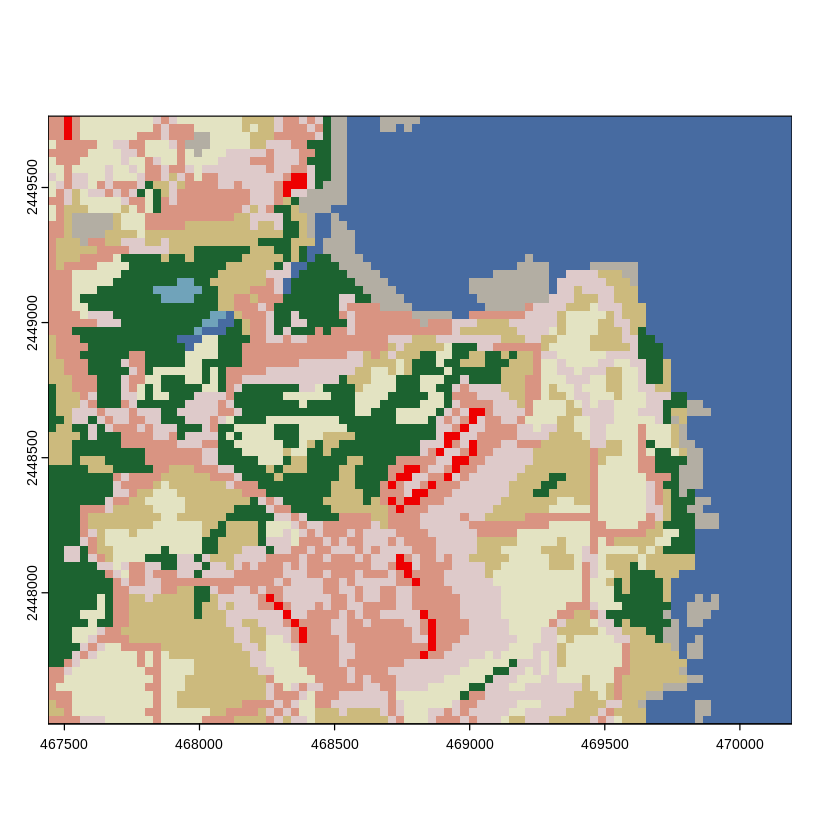

In [80]:
anahola_crop_nlcd_to_fishnet
anahola_crop_nlcd_to_fishnet %>% plot

In [ ]:
anahola_nwi <- st_read("/content/workingfolder/nwi/utm4/nwi_utm4.gpkg")
anahola_nwi_crs <- st_crs(anahola_nwi)$proj4string
anahola_nwi_crs # '+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs'

In [ ]:
st_crs(anahola_fishnet) # NAD83 / UTM zone 4N

In [ ]:
st_crs(anahola_nwi) # WGS 84 / UTM zone 4N

In [86]:
# this will reproject the anahola fishent to match anahola nwi
# reprojects the extent to the target

crs_target <- st_crs(anahola_nwi)
crs_extent<- st_crs(anahola_fishnet)


if(crs_target$epsg != crs_extent$epsg) {
  anahola_fishnet <- st_transform(anahola_fishnet, crs_target$epsg)
}

In [ ]:
st_crs(anahola_fishnet) # WGS 84 / UTM zone 4N

In [ ]:
st_crs(anahola_nwi)  # WGS 84 / UTM zone 4N

In [89]:
# crop the nwi data to the fishnet data
anahola_crop_nwi_to_fishnet <- st_intersection(anahola_nwi, anahola_fishnet)

# To ensure the result is valid and remove empty geometries
anahola_crop_nwi_to_fishnet <- st_collection_extract(anahola_crop_nwi_to_fishnet, "POLYGON") # Adjust "POLYGON" as needed
anahola_crop_nwi_to_fishnet <- anahola_crop_nwi_to_fishnet[!st_is_empty(anahola_crop_nwi_to_fishnet),]

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


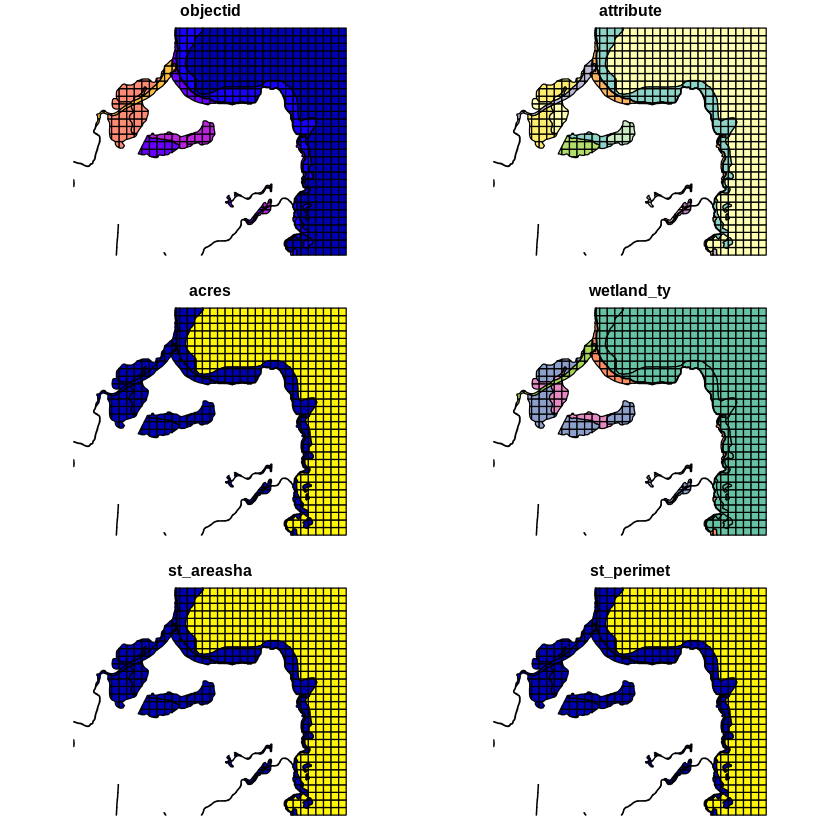

In [91]:
anahola_crop_nwi_to_fishnet %>% plot
# I have made a dataframe for anahola that's cropped to the fishnet, it shows the squares of the fishnet over laid with the nwi

In [96]:
# anahola_crop_nwi_to_fishnet %>% summary
str(anahola_crop_nwi_to_fishnet)

Classes ‘sf’ and 'data.frame':	776 obs. of  7 variables:
 $ objectid  : int  13471 12884 12884 12884 12884 10551 9736 10322 10551 9736 ...
 $ attribute : chr  "R4SBCx" "R3RBH" "R3RBH" "R3RBH" ...
 $ acres     : num  1.01 1.69 1.69 1.69 1.69 ...
 $ wetland_ty: chr  "Riverine" "Riverine" "Riverine" "Riverine" ...
 $ st_areasha: num  4091 6859 6859 6859 6859 ...
 $ st_perimet: num  2728 3430 3430 3430 3430 ...
 $ geom      :sfc_MULTIPOLYGON of length 776; first list element: List of 1
  ..$ :List of 1
  .. ..$ : num [1:7, 1:2] 467872 467874 467877 467875 467873 ...
  ..- attr(*, "class")= chr [1:3] "XY" "MULTIPOLYGON" "sfg"
 - attr(*, "sf_column")= chr "geom"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA NA NA NA NA NA
  ..- attr(*, "names")= chr [1:6] "objectid" "attribute" "acres" "wetland_ty" ...


In [ ]:
anahola_crop_nwi_to_fishnet %>% data.table
# This is the nwi data table for and only for anahola AOI

In [99]:
dir.create("/content/export/nwi")
dir.create("/content/export/nwi/utm4")
dir.create("/content/export/nwi/utm4/2018")

Warning message in dir.create("/content/export/nwi"):
“'/content/export/nwi' already exists”
Warning message in dir.create("/content/export/nwi/utm4"):
“'/content/export/nwi/utm4' already exists”


In [100]:
st_write(anahola_crop_nwi_to_fishnet, "/content/export/nwi/utm4/2018/anahola_crop_nwi_to_fishnet.gpkg", driver = "GPKG")

Writing layer `anahola_crop_nwi_to_fishnet' to data source 
  `/content/export/nwi/utm4/2018/anahola_crop_nwi_to_fishnet.gpkg' using driver `GPKG'
Writing 776 features with 6 fields and geometry type Multi Polygon.


In [ ]:
anahola_ccap
anahola_crop_ccap_to_fishnet
anahola_crop_dem_to_fishnet
anahola_crop_nlcd_to_fishnet
anahola_crop_nwi_to_fishnet
anahola_crop_stack_to_fishnet
anahola_dem
anahola_fishnet
anahola_nlcd
anahola_nwi
anahola_stack

update the crs of tif data

In [114]:
dir.create("/content/export/dem")
dir.create("/content/export/dem/utm4")

In [116]:
# Load the raster file you want to reproject
your_raster <- rast("/content/clipdata/dem/utm4/anahola.tif")

# Reproject your raster to match the CRS of anahola_nlcd
anahola_dem_reprojected <- project(your_raster, crs(anahola_nlcd))

# # Save the reprojected raster to a new file
writeRaster(anahola_dem_reprojected, "/content/export/dem/utm4/anahola_dem_reprojected.tif")


Warning message:
“[project,SpatRaster] argument y (the crs) should be a character value”


In [113]:
anahola_dem_reprojected

class       : SpatRaster 
dimensions  : 237, 290, 1  (nrow, ncol, nlyr)
resolution  : 9.518488, 9.518488  (x, y)
extent      : 467444.4, 470204.7, 2447516, 2449772  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source(s)   : memory
name        :  elevation 
min value   : -0.0705797 
max value   : 88.4222946 

In [122]:
anahola_dem_reprojected_raster <- raster(anahola_dem_reprojected)
anahola_dem_reprojected_raster

class      : RasterLayer 
dimensions : 237, 290, 68730  (nrow, ncol, ncell)
resolution : 9.518488, 9.518488  (x, y)
extent     : 467444.4, 470204.7, 2447516, 2449772  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : elevation 
values     : -0.0705797, 88.42229  (min, max)


In [124]:
# library(raster)

# Assuming anahola_dem_reprojected_raster and anahola_stack are already loaded

# First, ensure they are in the same CRS
# (Based on your information, they should be, but this is a good practice)

# Resample anahola_dem_reprojected_raster to match the resolution and extent of anahola_stack
# Choose a method appropriate for your data: 'bilinear' for continuous data, 'ngb' (nearest neighbor) for categorical
anahola_dem_reprojected_raster_resampled <- resample(anahola_dem_reprojected_raster, anahola_stack, method = "ngb")

# Then, add the resampled DEM layer to the stack
anahola_stack_with_dem <- addLayer(anahola_stack, anahola_dem_reprojected_raster_resampled)

# Now, anahola_stack_with_dem contains the original layers plus the new DEM layer


In [127]:
anahola_dem_reprojected_raster_resampled

class      : RasterLayer 
dimensions : 751, 918, 689418  (nrow, ncol, ncell)
resolution : 3, 3  (x, y)
extent     : 467439, 470193, 2447514, 2449767  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : elevation 
values     : -0.0705797, 88.42229  (min, max)


In [148]:
anahola_stack_with_dem %>% summary

Warning message in .local(object, ...):
“summary is an estimate based on a sample of 1e+05 cells (14.5% of all cells)
”


,anahola_2018.01.12_1.1,anahola_2018.01.12_1.2,anahola_2018.01.12_1.3,anahola_2018.01.12_1.4,anahola_2018.02.20_1.1,anahola_2018.02.20_1.2,anahola_2018.02.20_1.3,anahola_2018.02.20_1.4,anahola_2018.08.19_1.1,anahola_2018.08.19_1.2,anahola_2018.08.19_1.3,anahola_2018.08.19_1.4,anahola_2018.12.05_1.1,anahola_2018.12.05_1.2,anahola_2018.12.05_1.3,anahola_2018.12.05_1.4,elevation
Min.,175,289,24,26,168,127,112,140,61,40,18,40,151,104,95,129,-0.0705797
1st Qu.,309,440,206,204,315,300,324,351,231,256,265,310,331,340,312,1548,1.8857178
Median,365,524,360,2119,359,371,439,2244,324,356,408,2234,410,429,425,2634,10.8975692
3rd Qu.,442,666,585,2628,446,528,652,2769,411,506,740,2944,478,566,637,3253,37.4987526
Max.,3019,3515,3429,4595,4292,3723,5441,4714,3684,3973,4483,5361,4596,4985,5669,5838,88.4222946
NA's,931,931,931,931,931,931,931,931,931,931,931,931,931,931,931,931,68818.0000000


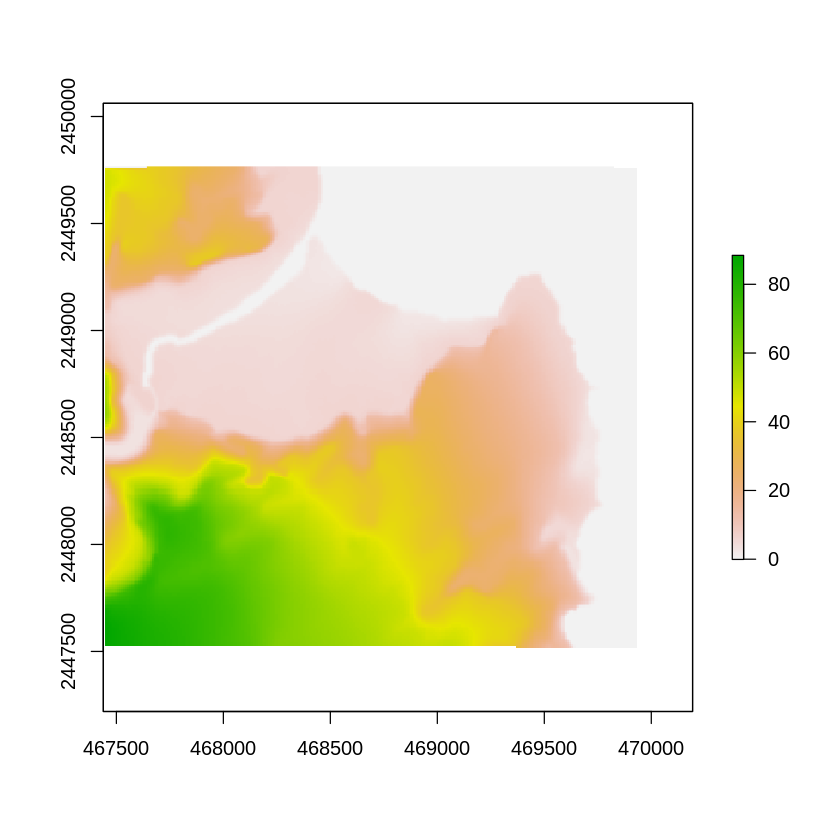

In [129]:
anahola_stack_with_dem$elevation %>% plot
# this is planet data with elevation stacked!!!!!!

lets stack the ccap data too


In [133]:
dir.create("/content/export/ccap")
dir.create("/content/export/ccap/utm4")

In [138]:
# reproject the ccap raster
# Reproject your raster to match the CRS of anahola_nlcd
anahola_ccap_reprojected <- projectRaster(anahola_ccap, crs=crs(anahola_nlcd))

# # Save the reprojected raster to a new file
writeRaster(anahola_ccap_reprojected, "/content/export/ccap/utm4/anahola_ccap_reprojected.tif")

In [150]:
anahola_ccap_reprojected

class      : RasterLayer 
dimensions : 946, 1156, 1093576  (nrow, ncol, ncell)
resolution : 2.4, 2.4  (x, y)
extent     : 467432.7, 470207.1, 2447505, 2449776  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : Layer_1 
values     : 0, 21  (min, max)


In [141]:
# anahola_ccap_reprojected_raster <-raster(anahola_ccap_reprojected)

In [144]:
# anahola_ccap_reprojected_raster

class      : RasterLayer 
dimensions : 946, 1156, 1093576  (nrow, ncol, ncell)
resolution : 2.4, 2.4  (x, y)
extent     : 467432.7, 470207.1, 2447505, 2449776  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 


In [151]:
# Resample anahola_dem_reprojected_raster to match the resolution and extent of anahola_stack
# Choose a method appropriate for your data: 'bilinear' for continuous data, 'ngb' (nearest neighbor) for categorical
anahola_ccap_reprojected_resampled <- resample(anahola_ccap_reprojected, anahola_stack, method = "ngb")

In [152]:
anahola_ccap_reprojected_resampled

class      : RasterLayer 
dimensions : 751, 918, 689418  (nrow, ncol, ncell)
resolution : 3, 3  (x, y)
extent     : 467439, 470193, 2447514, 2449767  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : Layer_1 
values     : 0, 21  (min, max)


In [153]:
# library(raster)

# Assuming anahola_dem_reprojected_raster and anahola_stack are already loaded

# First, ensure they are in the same CRS
# (Based on your information, they should be, but this is a good practice)



# Then, add the resampled DEM layer to the stack
anahola_stack_with_ccap <- addLayer(anahola_stack, anahola_ccap_reprojected_resampled)

# Now, anahola_stack_with_dem contains the original layers plus the new DEM layer

In [154]:
anahola_stack_with_dem_with_ccap <- addLayer(anahola_stack_with_dem, anahola_ccap_reprojected_resampled)

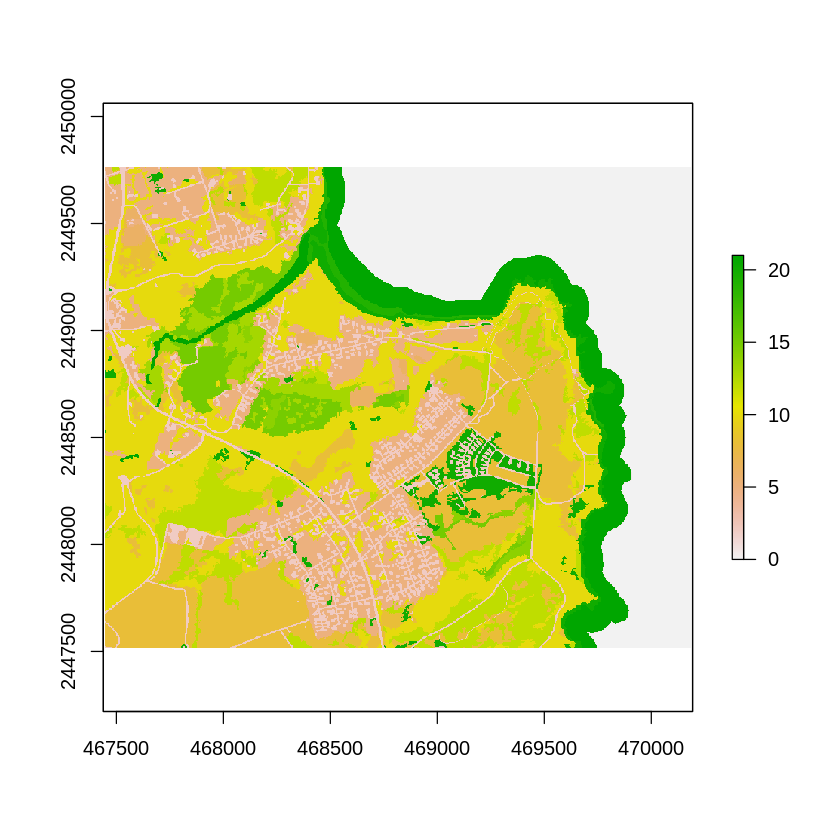

In [157]:
anahola_stack_with_dem_with_ccap$Layer_1 %>% plot

In [130]:
dir.create("/content/export/stack")
dir.create("/content/export/stack/utm4")

In [131]:
writeRaster(anahola_stack_with_dem, "/content/export/stack/utm4/anahola_stack_with_dem.tif")

In [158]:
writeRaster(anahola_stack_with_dem_with_ccap, "/content/export/stack/utm4/anahola_stack_with_dem_with_ccap.tif")

In [166]:
writeRaster(anahola_stack_with_dem_with_ccap_with_nlcd, "/content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd.tif")

In [216]:
writeRaster(anahola_stack_with_dem_with_ccap_with_nlcd_nwi, "/content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd_nwi.tif")

lets stack the nlcd too

In [159]:
dir.create("/content/export/nlcd")
dir.create("/content/export/nlcd/utm4")

In [160]:
anahola_nlcd <- raster ("/content/clipdata/nlcd/utm4/nlcd_anahola.tif")

In [161]:
anahola_nlcd_resampled <- resample(anahola_nlcd, anahola_stack, method = "ngb")

In [162]:
anahola_nlcd_resampled

class      : RasterLayer 
dimensions : 751, 918, 689418  (nrow, ncol, ncell)
resolution : 3, 3  (x, y)
extent     : 467439, 470193, 2447514, 2449767  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : nlcd_anahola 
values     : 11, 95  (min, max)


In [163]:
anahola_stack_with_dem_with_ccap_with_nlcd <- addLayer(anahola_stack_with_dem_with_ccap, anahola_nlcd_resampled)

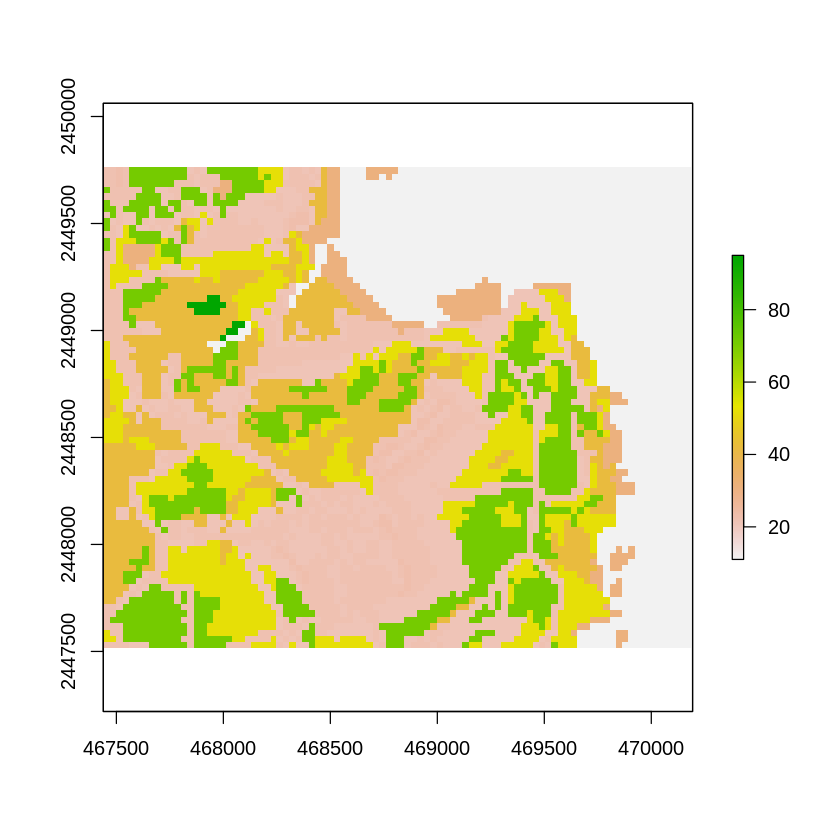

In [165]:
anahola_stack_with_dem_with_ccap_with_nlcd$nlcd_anahola %>% plot

lets convert it to a data frame and save the csv

In [217]:
raster_stack <- stack("/content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd_nwi.tif")
values <- getValues(raster_stack)
df <- as.data.frame(values, stringsAsFactors = FALSE)
dt <- as.data.table(df)

# Extract coordinates
coords <- as.data.frame(xyFromCell(raster_stack, 1:ncell(raster_stack)))
# Combine coordinates with the data frame
df_with_coords <- cbind(coords, df)
# Or for a data table
dt_with_coords <- cbind(coords, dt)

# For data frames
write.csv(df_with_coords, "/content/export/stack/utm4/df_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.csv", row.names = FALSE)
# For data tables
fwrite(dt_with_coords, "/content/export/stack/utm4/dt_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.csv")

hmm. how can I use the nwi data to replace the values of the nlcd??

In [ ]:
nwi_utm4
anahola_fishnet

In [ ]:
st_crs(anahola_crop_nwi_to_fishnet)  # WGS 84 / UTM zone 4N

In [ ]:
st_crs(anahola_fishnet) # WGS 84 / UTM zone 4N

In [184]:
anahola_nwi_intersection <- st_intersection(nwi_utm4, anahola_fishnet)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


In [200]:
anahola_nwi_crop <- st_read("/content/export/nwi/utm4/2018/anahola_crop_nwi_to_fishnet.gpkg")

Reading layer `anahola_crop_nwi_to_fishnet' from data source 
  `/content/export/nwi/utm4/2018/anahola_crop_nwi_to_fishnet.gpkg' 
  using driver `GPKG'
Simple feature collection with 776 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 467439.3 ymin: 2447515 xmax: 470204.2 ymax: 2449819
Projected CRS: WGS 84 / UTM zone 4N


In [203]:
anahola_nwi_crop$wetland_ty <- as.factor(anahola_nwi_crop$wetland_ty)
anahola_nwi_crop_and_nlcd <- rasterize(anahola_nwi_crop, anahola_nlcd_resampled, field="wetland_ty")

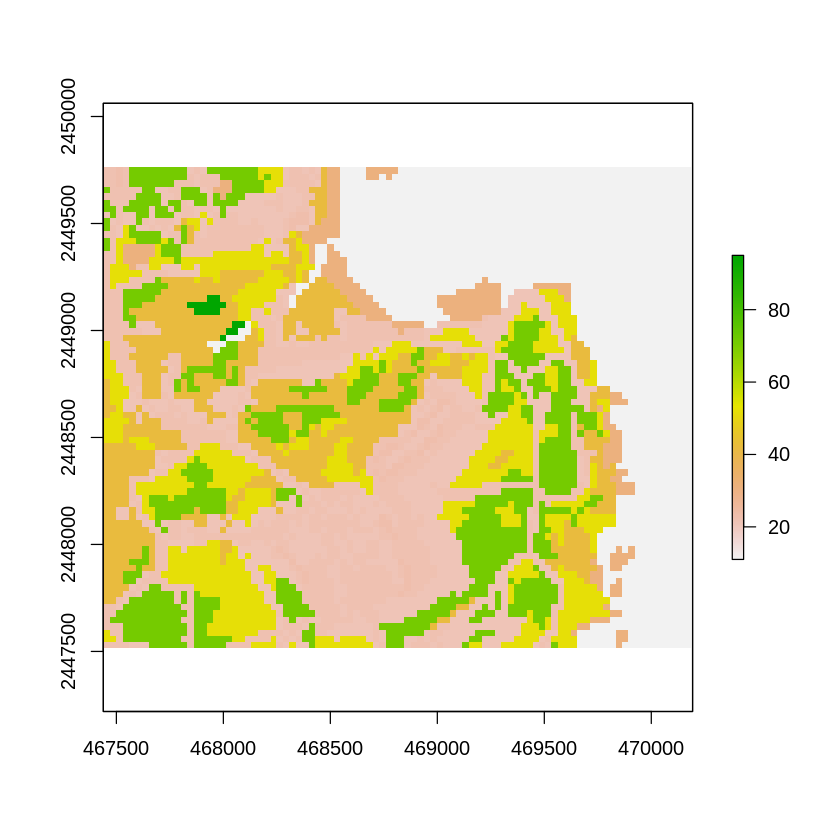

In [213]:
anahola_stack_with_dem_with_ccap_with_nlcd_nwi[[19]] %>% plot

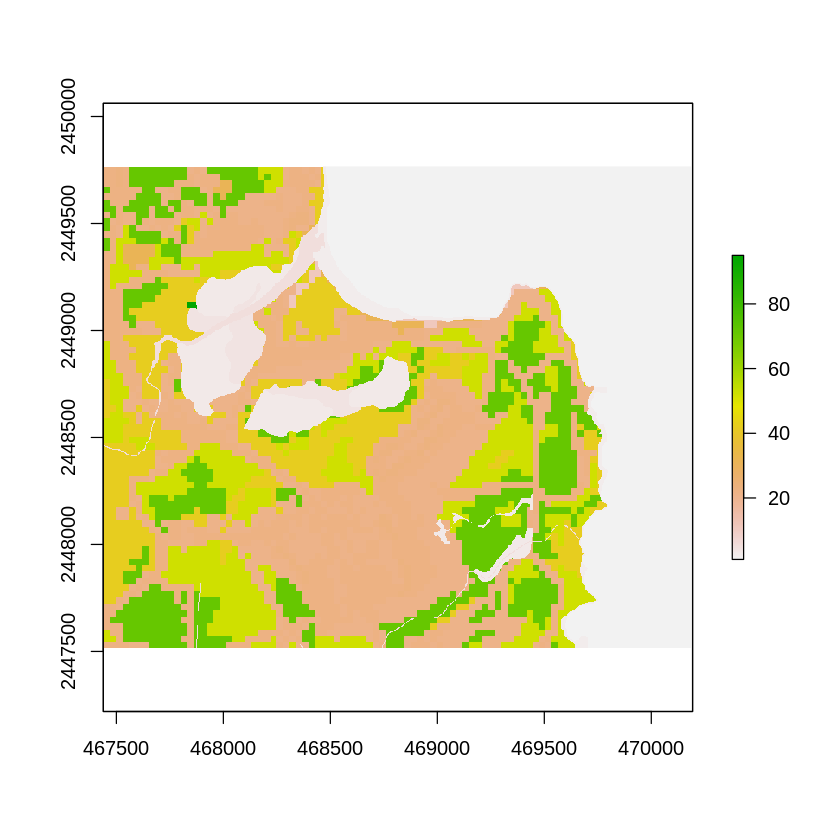

In [224]:
anahola_stack_with_dem_with_ccap_with_nlcd_nwi[[20]] %>% plot

In [225]:
anahola_nlcd_resampled

class      : RasterLayer 
dimensions : 751, 918, 689418  (nrow, ncol, ncell)
resolution : 3, 3  (x, y)
extent     : 467439, 470193, 2447514, 2449767  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : nlcd_anahola 
values     : 11, 95  (min, max)


In [230]:
anahola_nwi_crop$wetland_ty %>% unique %>% list

[[1]]
[1] Riverine                          Estuarine and Marine Wetland     
[3] Estuarine and Marine Deepwater    Freshwater Emergent Wetland      
[5] Freshwater Forested/Shrub Wetland
5 Levels: Estuarine and Marine Deepwater ... Riverine

anahola_nwi_crop - need to assign a number to wetland_ty so I can align it with the nlcd numbers

In [231]:
# make a look up table

wetland_mapping <- data.frame(
  wetland_ty = c("Estuarine and Marine Deepwater", "Lake", "Riverine", "Estuarine and Marine Wetland",
  "Freshwater Emergent Wetland", "Freshwater Forested/Shrub Wetland", "Freshwater Pond"),
  value = c(1, 1, 1, 2, 3, 4, 5) # Assigning 1 to water-related types, and other values to other types
)

In [ ]:
data.table(anahola_nwi_crop)

In [236]:
# conver wetland_ty to factor
anahola_nwi_crop$wetland_ty <- as.factor(anahola_nwi_crop$wetland_ty)


In [237]:
anahola_nwi_crop$wetland_ty_numeric <- as.numeric(anahola_nwi_crop$wetland_ty)


In [240]:
wetland_type_mapping <- unique(data.frame(
  wetland_ty = levels(anahola_nwi_crop$wetland_ty),
  wetland_ty_numeric = as.numeric(levels(anahola_nwi_crop$wetland_ty))
))

Warning message in data.frame(wetland_ty = levels(anahola_nwi_crop$wetland_ty), :
“NAs introduced by coercion”


In [ ]:
anahola_nwi_crop

In [242]:
anahola_nwi_crop_and_nlcd <- rasterize(anahola_nwi_crop, anahola_nlcd_resampled, field="wetland_ty_numeric")


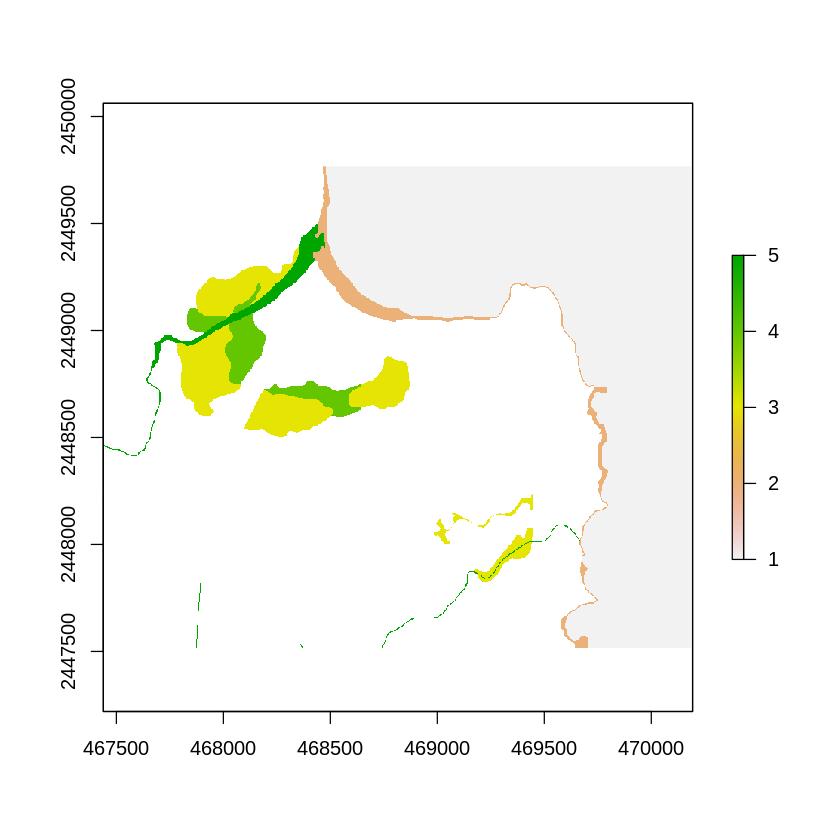

In [244]:
anahola_nwi_crop_and_nlcd %>% plot

In [245]:
combined_anahola_nwi_crop_and_nlcd <- cover(anahola_nwi_crop_and_nlcd, anahola_nlcd_resampled)

In [246]:
anahola_stack_with_dem_with_ccap_with_nlcd_nwi <- addLayer(anahola_stack_with_dem_with_ccap_with_nlcd, combined_anahola_nwi_crop_and_nlcd)

In [248]:
anahola_stack_with_dem_with_ccap_with_nlcd_nwi%>% summary

Warning message in .local(object, ...):
“summary is an estimate based on a sample of 1e+05 cells (14.5% of all cells)
”


,anahola_2018.01.12_1.1,anahola_2018.01.12_1.2,anahola_2018.01.12_1.3,anahola_2018.01.12_1.4,anahola_2018.02.20_1.1,anahola_2018.02.20_1.2,anahola_2018.02.20_1.3,anahola_2018.02.20_1.4,anahola_2018.08.19_1.1,anahola_2018.08.19_1.2,anahola_2018.08.19_1.3,anahola_2018.08.19_1.4,anahola_2018.12.05_1.1,anahola_2018.12.05_1.2,anahola_2018.12.05_1.3,anahola_2018.12.05_1.4,elevation,Layer_1,nlcd_anahola,layer
Min.,175,289,24,26,168,127,112,140,61,40,18,40,151,104,95,129,-0.0705797,0,11,1
1st Qu.,309,440,206,204,315,300,324,351,231,256,265,310,331,340,312,1548,1.8857178,2,11,1
Median,365,524,360,2119,359,371,439,2244,324,356,408,2234,410,429,425,2634,10.8975692,8,22,21
3rd Qu.,442,666,585,2628,446,528,652,2769,411,506,740,2944,478,566,637,3253,37.4987526,10,52,42
Max.,3019,3515,3429,4595,4292,3723,5441,4714,3684,3973,4483,5361,4596,4985,5669,5838,88.4222946,21,95,95
NA's,931,931,931,931,931,931,931,931,931,931,931,931,931,931,931,931,68818.0000000,4371,2406,896


In [249]:
writeRaster(anahola_stack_with_dem_with_ccap_with_nlcd_nwi, "/content/export/stack/utm4/updated_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.tif")

In [233]:
# library(dplyr)

# Ensure anahola_nwi_crop is a data frame or tibble for easier manipulation
# If anahola_nwi_crop is an sf object, it works with dplyr as well
anahola_nwi_crop <- anahola_nwi_crop %>%
  left_join(wetland_mapping, by = "wetland_ty") %>%
  mutate(wetland_ty_numeric = ifelse(is.na(value), default_value, value)) # Replace NA with a default value if needed

# Note: default_value should be replaced with the numeric value you want to assign to any wetland_ty not listed in wetland_mapping


ERROR: Error in mutate(., wetland_ty_numeric = ifelse(is.na(value), default_value, : could not find function "mutate"


end

In [218]:
# save ccap to exports in drive

# https://drive.google.com/drive/folders/1s5rSbK8EGVjdBUK5P3uSrTKkTzlz9PWq?usp=drive_link
drive_upload(media = "/content/export/ccap/utm4/anahola_ccap_reprojected.tif", path = as_id("1s5rSbK8EGVjdBUK5P3uSrTKkTzlz9PWq"))

Auto-refreshing stale OAuth token.

Local file:

• /content/export/ccap/utm4/anahola_ccap_reprojected.tif

Uploaded into Drive file:

• anahola_ccap_reprojected.tif <id: 1hDEjN78OXbdS3Hd5IhKEYSaBNJivi4Pi>

With MIME type:

• image/tiff



In [219]:
# save dem to exports in drive

# https://drive.google.com/drive/folders/1-78iKpGE1aeuGp68LNwU0tXu9DiRYYyO?usp=drive_link
drive_upload(media = "/content/export/dem/utm4/anahola_dem_reprojected.tif", path = as_id("1-78iKpGE1aeuGp68LNwU0tXu9DiRYYyO"))

Local file:

• /content/export/dem/utm4/anahola_dem_reprojected.tif

Uploaded into Drive file:

• anahola_dem_reprojected.tif <id: 1xdYfUi2DYy7XdrrMKZAx7nbekb6NF5Cd>

With MIME type:

• image/tiff



In [220]:
# save nwi to exports in drive

# https://drive.google.com/drive/folders/1XiWhFdbQ1njVRFtlfbctB9S-0L4LGHDE?usp=drive_link
drive_upload(media = "/content/export/nwi/utm4/2018/anahola_crop_nwi_to_fishnet.gpkg", path = as_id("1XiWhFdbQ1njVRFtlfbctB9S-0L4LGHDE"))

Local file:

• /content/export/nwi/utm4/2018/anahola_crop_nwi_to_fishnet.gpkg

Uploaded into Drive file:

• anahola_crop_nwi_to_fishnet.gpkg <id: 1o3ier3EAW-1bRouu4JdX3kvKlwMqm8Zs>

With MIME type:

• application/geopackage+sqlite3



In [221]:
# save planet stack to exports in drive

# https://drive.google.com/drive/folders/1Sv8kasYOXjI4WTeGiEgL69bcsPyIvX0E?usp=drive_link
drive_upload(media = "/content/export/planet/utm4/2018/anahola_stack_2018.tif", path = as_id("1Sv8kasYOXjI4WTeGiEgL69bcsPyIvX0E"))

Local file:

• /content/export/planet/utm4/2018/anahola_stack_2018.tif

Uploaded into Drive file:

• anahola_stack_2018.tif <id: 1YMKwTCMz_mkBHGAfXGx3mAAuXXkG_bln>

With MIME type:

• image/tiff



In [250]:
drive_upload(media = "/content/export/stack/utm4/updated_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.tif", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))


Local file:

• /content/export/stack/utm4/updated_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.tif

Uploaded into Drive file:

• updated_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.tif
  <id: 1QIo_IYkmsbYdzJ1QUvcfoxapiLWBzkxI>

With MIME type:

• image/tiff



In [222]:
# save stack to exports in drive

# https://drive.google.com/drive/folders/1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO?usp=drive_link
drive_upload(media = "/content/export/stack/utm4/anahola_stack_with_dem.tif", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))
drive_upload(media = "/content/export/stack/utm4/anahola_stack_with_dem_with_ccap.tif", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))
drive_upload(media = "/content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd.tif", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))
drive_upload(media = "/content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd.csv", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))
drive_upload(media = "/content/export/stack/utm4/df_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.csv", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))
drive_upload(media = "/content/export/stack/utm4/dt_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.csv", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))
drive_upload(media = "/content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd_nwi.tif", path = as_id("1U-gApBqqIyKflAoMcHV4H3eS5ga0L9wO"))

Local file:

• /content/export/stack/utm4/anahola_stack_with_dem.tif

Uploaded into Drive file:

• anahola_stack_with_dem.tif <id: 1ezqF4SL2TRkXft95kTHxvwVSMcyUxbbH>

With MIME type:

• image/tiff

Local file:

• /content/export/stack/utm4/anahola_stack_with_dem_with_ccap.tif

Uploaded into Drive file:

• anahola_stack_with_dem_with_ccap.tif <id: 1GO6jFbWMpGFKhRKe8JHydOzSLuEIuJaq>

With MIME type:

• image/tiff

Local file:

• /content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd.tif

Uploaded into Drive file:

• anahola_stack_with_dem_with_ccap_with_nlcd.tif
  <id: 180WlcajKqCIm4oNrV-1TLBheuv_0awmx>

With MIME type:

• image/tiff

Local file:

• /content/export/stack/utm4/anahola_stack_with_dem_with_ccap_with_nlcd.csv

Uploaded into Drive file:

• anahola_stack_with_dem_with_ccap_with_nlcd.csv
  <id: 1VQuELLsX3d-AMnrLhVdm50eUa78vEPmL>

With MIME type:

• text/csv

Local file:

• /content/export/stack/utm4/df_anahola_stack_with_dem_with_ccap_with_nlcd_nwi.csv

Uploaded 

In [ ]:
lokoaka_fishnet <- st_read("/content/workingfolder/utm5/lokoaka_kionakapahu.gpkg")

In [ ]:
st_crs(lokoaka_fishnet) # NAD83 / UTM zone 5N

# Setting up the next set of planet images


In [266]:
haleiwa_2018_stack <- stack(
"/content/clipdata/planet/utm4/2018/haleiwa_2018-01-12.tif",
"/content/clipdata/planet/utm4/2018/haleiwa_2018-02-12.tif",
"/content/clipdata/planet/utm4/2018/haleiwa_2018-11-28.tif")

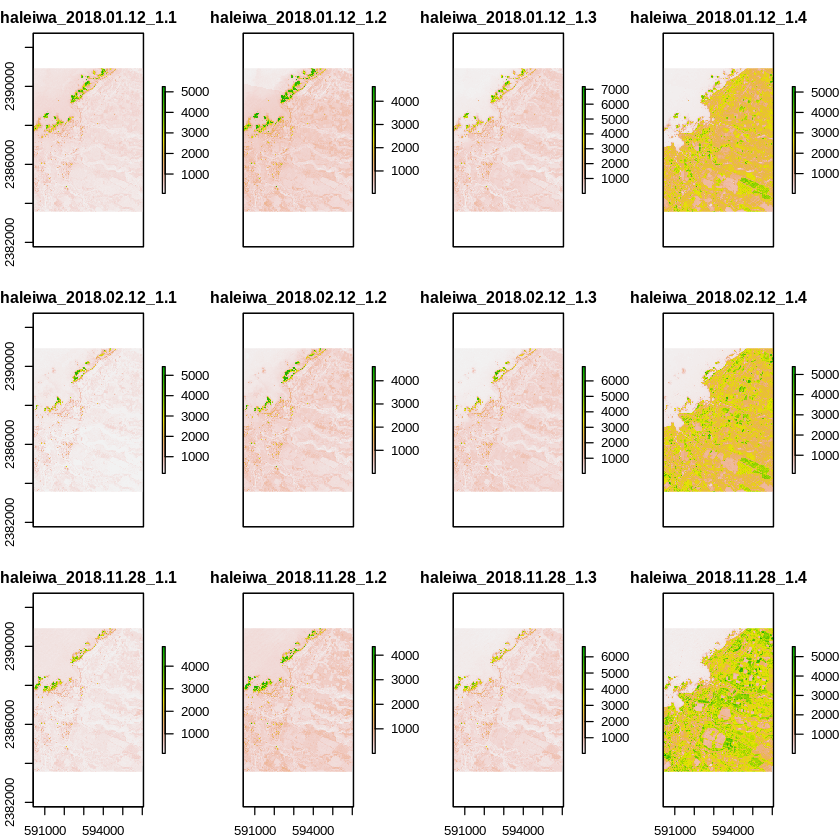

In [267]:
haleiwa_2018_stack%>% plot

In [268]:
stack_export <- "/content/export/planet/utm4/2018/haleiwa_2018_stack.tif"
writeRaster(haleiwa_2018_stack, filename=stack_export, format="GTiff", overwrite=TRUE)

haleiwa_fishnet <- st_read("/content/workingfolder/utm4/haleiwa.gpkg")

haleiwa_ccap <- raster("/content/clipdata/ccap/utm4/haleiwa.tif")
haleiwa_ccap_crs <- proj4string(haleiwa_ccap)
haleiwa_ccap_crs # '+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs'

haleiwa_dem <- raster ("/content/clipdata/dem/utm4/haleiwa.tif")
haleiwa_dem_crs <- proj4string(haleiwa_dem)
haleiwa_dem_crs # '+proj=longlat +datum=NAD83 +no_defs'

haleiwa_nlcd <- raster ("/content/clipdata/nlcd/utm4/nlcd_haleiwa.tif")
haleiwa_nlcd_crs <- proj4string(haleiwa_nlcd)
haleiwa_nlcd_crs # '+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs'

haleiwa_nwi <- st_read("/content/export/nwi/utm4_nwi_numberic.gpkg")
haleiwa_nwi_crs <- st_crs(haleiwa_nwi)$proj4string
haleiwa_nwi_crs # '+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs'

Reading layer `haleiwa' from data source 
  `/content/workingfolder/utm4/haleiwa.gpkg' using driver `GPKG'
Simple feature collection with 7104 features and 0 fields
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: 590408.8 ymin: 2383570 xmax: 596092 ymax: 2390943
Projected CRS: NAD83 / UTM zone 4N


[1] "+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs"

[1] "+proj=longlat +datum=NAD83 +no_defs"

In [271]:
haleiwa_crop_stack_to_fishnet <- rast(haleiwa_2018_stack, ext(haleiwa_fishnet))
haleiwa_crop_dem_to_fishnet <- rast(haleiwa_dem, ext(haleiwa_fishnet))
haleiwa_crop_ccap_to_fishnet <- rast(haleiwa_ccap, ext(haleiwa_fishnet))
haleiwa_crop_nlcd_to_fishnet <- rast(haleiwa_nlcd, ext(haleiwa_fishnet))

Reading layer `nwi_wetlands' from data source 
  `/content/workingfolder/nwi/utm4/nwi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 10866 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 412977.7 ymin: 2263072 xmax: 820600.7 ymax: 2464465
Projected CRS: WGS 84 / UTM zone 4N


[1] "+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs"

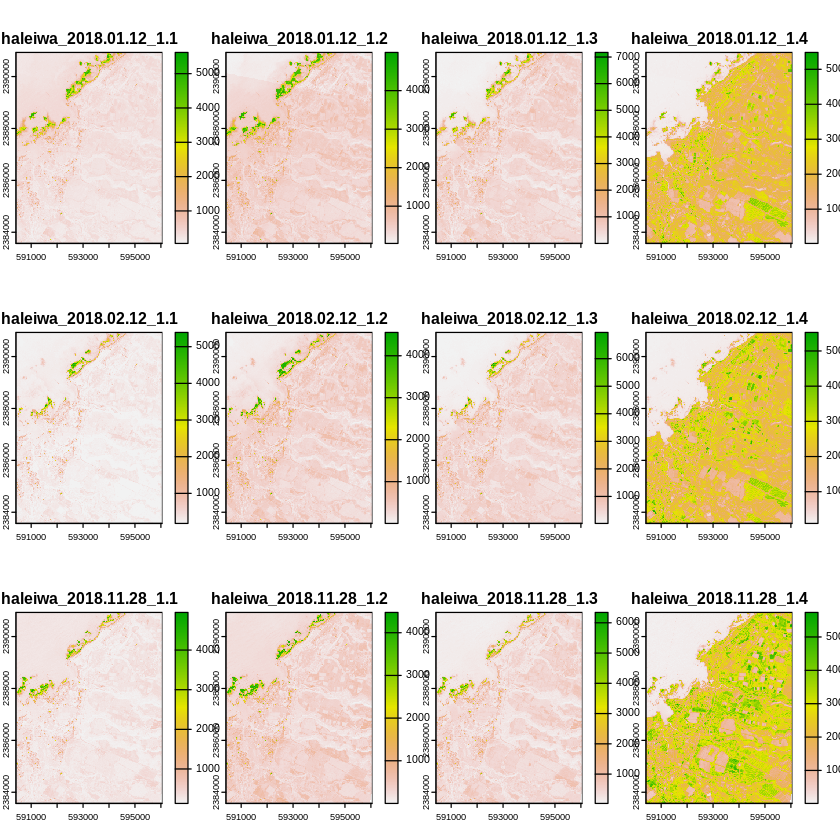

In [310]:
haleiwa_crop_stack_to_fishnet %>% plot

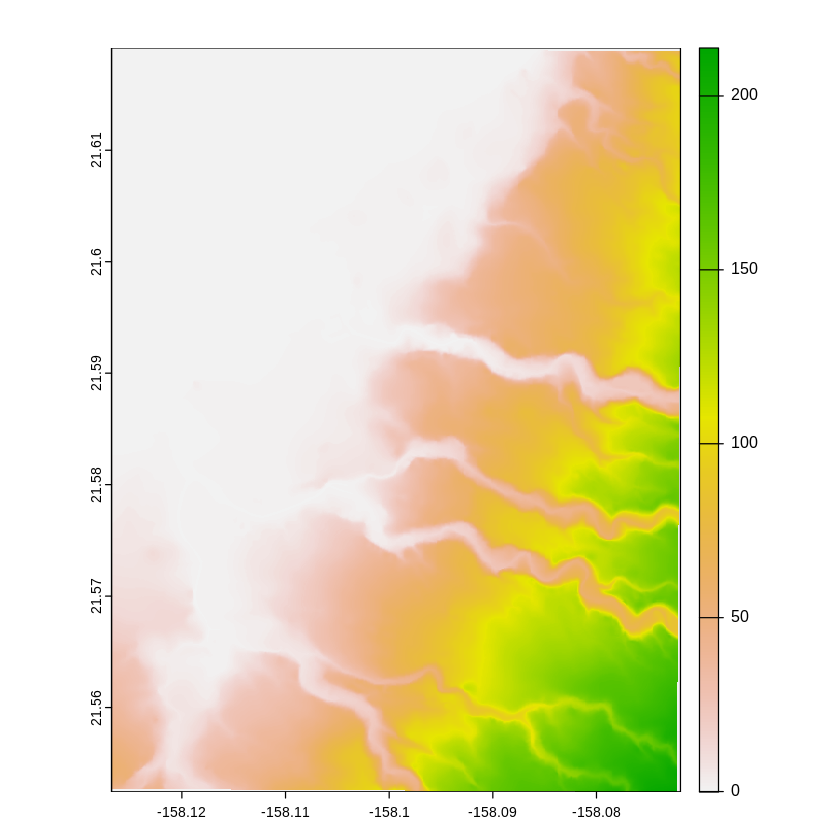

In [311]:
haleiwa_crop_dem_to_fishnet %>% plot

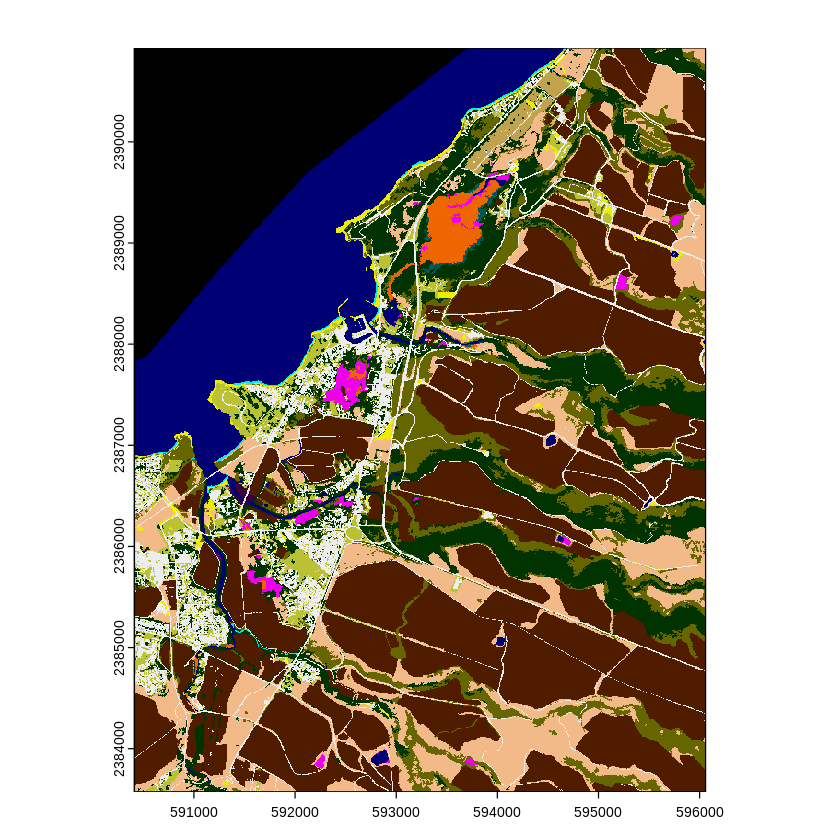

In [309]:
haleiwa_crop_ccap_to_fishnet%>% plot

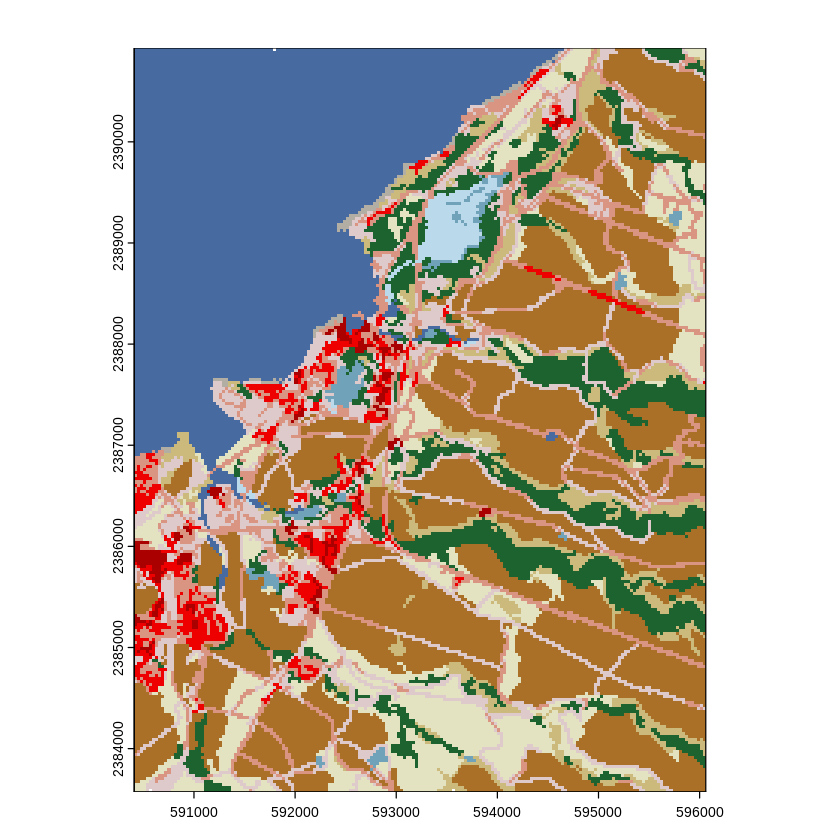

In [312]:
haleiwa_crop_nlcd_to_fishnet %>% plot

In [272]:
# this will reproject the aoi fishent to match aoi-nwi
# reprojects the extent to the target

crs_target <- st_crs(haleiwa_nwi)
crs_extent<- st_crs(haleiwa_fishnet)

if(crs_target$epsg != crs_extent$epsg) {
  haleiwa_fishnet <- st_transform(haleiwa_fishnet, crs_target$epsg)
}

Update the CRS of the tif data

In [276]:
# Load, reproject, write raster
your_raster <- rast("/content/clipdata/dem/utm4/haleiwa.tif")
haleiwa_dem_reprojected <- project(your_raster, crs(haleiwa_nlcd))
writeRaster(haleiwa_dem_reprojected, "/content/export/dem/utm4/haleiwa_dem_reprojected.tif")

Warning message:
“[project,SpatRaster] argument y (the crs) should be a character value”


In [280]:
haleiwa_dem_reprojected # +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs

class       : SpatRaster 
dimensions  : 766, 591, 1  (nrow, ncol, nlyr)
resolution  : 9.689167, 9.689167  (x, y)
extent      : 590375.6, 596101.9, 2383542, 2390964  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source(s)   : memory
name        :    elevation 
min value   :  -0.09075198 
max value   : 213.76513672 

In [278]:
haleiwa_dem_reprojected_raster <- raster(haleiwa_dem_reprojected)

In [279]:
haleiwa_dem_reprojected_raster

class      : RasterLayer 
dimensions : 766, 591, 452706  (nrow, ncol, ncell)
resolution : 9.689167, 9.689167  (x, y)
extent     : 590375.6, 596101.9, 2383542, 2390964  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : elevation 
values     : -0.09075198, 213.7651  (min, max)


In [324]:
haleiwa_dem_reprojected_raster_resampled <- resample(haleiwa_dem_reprojected_raster, haleiwa_2018_stack, method = "ngb")
haleiwa_stack_dem <- addLayer(haleiwa_2018_stack, haleiwa_dem_reprojected_raster_resampled)

# # Calculate min and max values for each layer in the stack
# min_values <- minValue(haleiwa_stack_with_dem)
# max_values <- maxValue(haleiwa_stack_with_dem)

# # Print the min and max values
# print(min_values)
# print(max_values)

# set the min and max values for the image files so they arent ?
haleiwa_stack_dem <- setMinMax(haleiwa_stack_dem)

In [328]:
haleiwa_stack_dem

class      : RasterStack 
dimensions : 2454, 1884, 4623336, 13  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590409, 596061, 2383569, 2390931  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : haleiwa_2018.01.12_1.1, haleiwa_2018.01.12_1.2, haleiwa_2018.01.12_1.3, haleiwa_2018.01.12_1.4, haleiwa_2018.02.12_1.1, haleiwa_2018.02.12_1.2, haleiwa_2018.02.12_1.3, haleiwa_2018.02.12_1.4, haleiwa_2018.11.28_1.1, haleiwa_2018.11.28_1.2, haleiwa_2018.11.28_1.3, haleiwa_2018.11.28_1.4,    elevation 
min values :            46.00000000,            11.00000000,             1.00000000,             1.00000000,           180.00000000,             2.00000000,            18.00000000,            73.00000000,           130.00000000,             1.00000000,             1.00000000,             5.00000000,  -0.09075198 
max values :              5859.0000,              4993.0000,              7294.0000,              5970.0000,        

In [326]:
# reproject the ccap raster
haleiwa_ccap_reprojected <- projectRaster(haleiwa_ccap, crs=crs(haleiwa_nlcd))
names(haleiwa_ccap_reprojected) <- "ccap"
haleiwa_ccap_reprojected_resampled <- resample(haleiwa_ccap_reprojected, haleiwa_2018_stack, method = "ngb")

In [327]:
haleiwa_ccap_reprojected_resampled

class      : RasterLayer 
dimensions : 2454, 1884, 4623336  (nrow, ncol, ncell)
resolution : 3, 3  (x, y)
extent     : 590409, 596061, 2383569, 2390931  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      : ccap 
values     : 0, 21  (min, max)


In [343]:
haleiwa_stack_dem_ccap <- addLayer(haleiwa_stack_dem, haleiwa_ccap_reprojected_resampled)
writeRaster(haleiwa_stack_dem_ccap, "/content/export/stack/utm4/haleiwa_stack_dem_ccap.tif", overwrite= TRUE)

In [330]:
haleiwa_stack_dem_ccap

class      : RasterStack 
dimensions : 2454, 1884, 4623336, 14  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590409, 596061, 2383569, 2390931  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : haleiwa_2018.01.12_1.1, haleiwa_2018.01.12_1.2, haleiwa_2018.01.12_1.3, haleiwa_2018.01.12_1.4, haleiwa_2018.02.12_1.1, haleiwa_2018.02.12_1.2, haleiwa_2018.02.12_1.3, haleiwa_2018.02.12_1.4, haleiwa_2018.11.28_1.1, haleiwa_2018.11.28_1.2, haleiwa_2018.11.28_1.3, haleiwa_2018.11.28_1.4,    elevation,         ccap 
min values :            46.00000000,            11.00000000,             1.00000000,             1.00000000,           180.00000000,             2.00000000,            18.00000000,            73.00000000,           130.00000000,             1.00000000,             1.00000000,             5.00000000,  -0.09075198,   0.00000000 
max values :              5859.0000,              4993.0000,              7294.0000,    

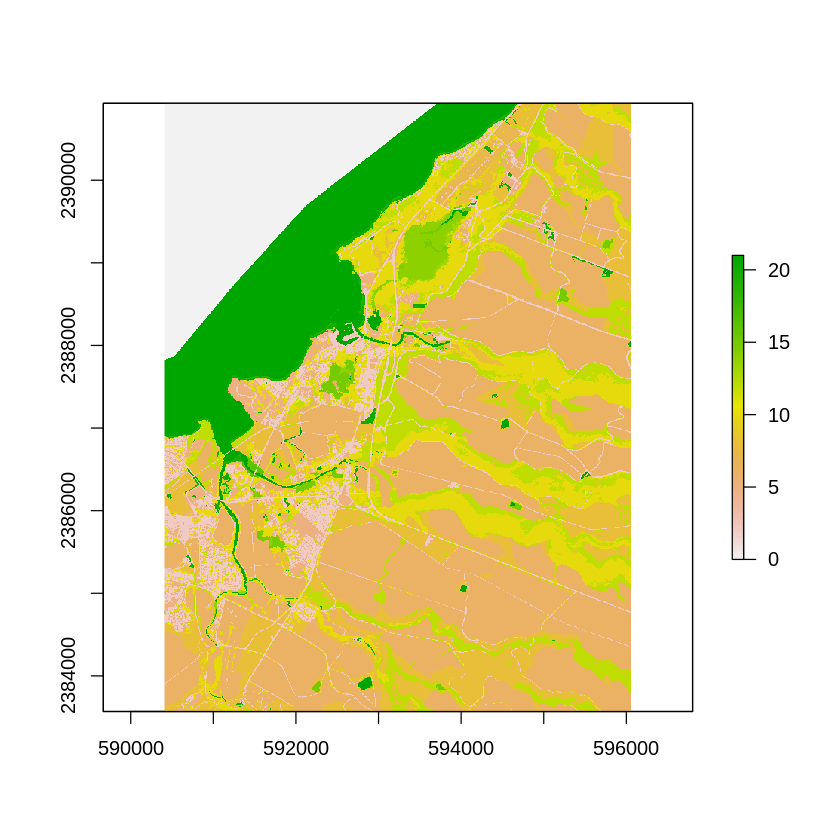

In [332]:
haleiwa_stack_dem_ccap$ccap %>% plot

In [333]:
haleiwa_nlcd

class      : RasterLayer 
dimensions : 246, 189, 46494  (nrow, ncol, ncell)
resolution : 29.90264, 29.90539  (x, y)
extent     : 590409.2, 596060.8, 2383571, 2390928  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : nlcd_haleiwa.tif 
names      : nlcd_haleiwa 


In [344]:
haleiwa_nlcd_resampled <- resample(haleiwa_nlcd, haleiwa_2018_stack, method = "ngb")
names(haleiwa_nlcd_resampled) <- "nlcd"
haleiwa_stack_dem_ccap_nlcd <- addLayer(haleiwa_stack_dem_ccap, haleiwa_nlcd_resampled)
writeRaster(haleiwa_stack_dem_ccap_nlcd, "/content/export/stack/utm4/haleiwa_stack_dem_ccap_nlcd.tif")

In [346]:
haleiwa_stack_dem_ccap_nlcd

class      : RasterStack 
dimensions : 2454, 1884, 4623336, 15  (nrow, ncol, ncell, nlayers)
resolution : 3, 3  (x, y)
extent     : 590409, 596061, 2383569, 2390931  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : haleiwa_2018.01.12_1.1, haleiwa_2018.01.12_1.2, haleiwa_2018.01.12_1.3, haleiwa_2018.01.12_1.4, haleiwa_2018.02.12_1.1, haleiwa_2018.02.12_1.2, haleiwa_2018.02.12_1.3, haleiwa_2018.02.12_1.4, haleiwa_2018.11.28_1.1, haleiwa_2018.11.28_1.2, haleiwa_2018.11.28_1.3, haleiwa_2018.11.28_1.4,    elevation,         ccap,         nlcd 
min values :            46.00000000,            11.00000000,             1.00000000,             1.00000000,           180.00000000,             2.00000000,            18.00000000,            73.00000000,           130.00000000,             1.00000000,             1.00000000,             5.00000000,  -0.09075198,   0.00000000,  11.00000000 
max values :              5859.0000,              4993.0000,

In [ ]:
st_crs(haleiwa_nwi) # WGS 84 / UTM zone 4N

In [355]:
haleiwa_nwi$wetland_ty %>% unique

[1] "Estuarine and Marine Deepwater"    "Estuarine and Marine Wetland"     
[3] "Freshwater Emergent Wetland"       "Freshwater Forested/Shrub Wetland"
[5] "Freshwater Pond"                   "Riverine"                         
[7] "Lake"

In [356]:
all_nwi <- st_read("/content/workingfolder/nwi/utm4/nwi_utm4.gpkg")
all_nwi_crs <- st_crs(all_nwi)$proj4string
all_nwi_crs # '+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs'

Reading layer `nwi_wetlands' from data source 
  `/content/workingfolder/nwi/utm4/nwi_utm4.gpkg' using driver `GPKG'
Simple feature collection with 10866 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 412977.7 ymin: 2263072 xmax: 820600.7 ymax: 2464465
Projected CRS: WGS 84 / UTM zone 4N


[1] "+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs"

In [361]:
all_nwi$wetland_ty %>% unique

[1] "Estuarine and Marine Deepwater"    "Estuarine and Marine Wetland"     
[3] "Freshwater Emergent Wetland"       "Freshwater Forested/Shrub Wetland"
[5] "Freshwater Pond"                   "Riverine"                         
[7] "Lake"

In [362]:
# make a look up table

wetland_mapping <- data.frame(
  wetland_ty = c("Estuarine and Marine Deepwater", "Lake", "Riverine", "Estuarine and Marine Wetland",
  "Freshwater Emergent Wetland", "Freshwater Forested/Shrub Wetland", "Freshwater Pond"),
  value = c(1, 1, 1, 2, 3, 4, 5) # Assigning 1 to water-related types, and other values to other types
)

In [363]:
class(all_nwi)

[1] "sf"         "data.frame"

In [367]:
# Ensure anahola_nwi_crop is a data frame or tibble for easier manipulation
# If anahola_nwi_crop is an sf object, it works with dplyr as well
all_nwi <- all_nwi %>%
  left_join(wetland_mapping, by = "wetland_ty") %>%
  mutate(wetland_ty_numeric = ifelse(is.na(value), default_value, value)) # Replace NA with a default value if needed

# Note: default_value should be replaced with the numeric value you want to assign to any wetland_ty not listed in wetland_mapping

In [372]:
st_write(all_nwi, "/content/export/nwi/utm_nwi_numberic.gpkg", driver = "GPKG")

Writing layer `utm_nwi_numberic' to data source 
  `/content/export/nwi/utm_nwi_numberic.gpkg' using driver `GPKG'
Writing 10866 features with 8 fields and geometry type Multi Polygon.


In [374]:
# https://drive.google.com/drive/folders/1bWOmRF4r5879u2F2cDKCpWNKzyM4dowS?usp=drive_link
drive_upload(media = "/content/export/nwi/utm4_nwi_numberic.gpkg", path = as_id("1bWOmRF4r5879u2F2cDKCpWNKzyM4dowS"))


Local file:

• /content/export/nwi/utm4_nwi_numberic.gpkg

Uploaded into Drive file:

• utm4_nwi_numberic.gpkg <id: 1ylMwqAV7AEZglnvOrTdPDSz5XJsUyHO->

With MIME type:

• application/geopackage+sqlite3



In [375]:
haleiwa_nwi <- st_read("/content/export/nwi/utm4_nwi_numberic.gpkg")
haleiwa_nwi_crs <- st_crs(haleiwa_nwi)$proj4string
haleiwa_nwi_crs # '+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs'

Reading layer `utm_nwi_numberic' from data source 
  `/content/export/nwi/utm4_nwi_numberic.gpkg' using driver `GPKG'
Simple feature collection with 10866 features and 8 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: 412977.7 ymin: 2263072 xmax: 820600.7 ymax: 2464465
Projected CRS: WGS 84 / UTM zone 4N


[1] "+proj=utm +zone=4 +datum=WGS84 +units=m +no_defs"

In [376]:
# crop the nwi data to the fishnet data
haleiwa_crop_nwi_to_fishnet <- st_intersection(haleiwa_nwi, haleiwa_fishnet)

# To ensure the result is valid and remove empty geometries
haleiwa_crop_nwi_to_fishnet <- st_collection_extract(haleiwa_crop_nwi_to_fishnet, "POLYGON") # Adjust "POLYGON" as needed
haleiwa_crop_nwi_to_fishnet <- haleiwa_crop_nwi_to_fishnet[!st_is_empty(haleiwa_crop_nwi_to_fishnet),]


Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


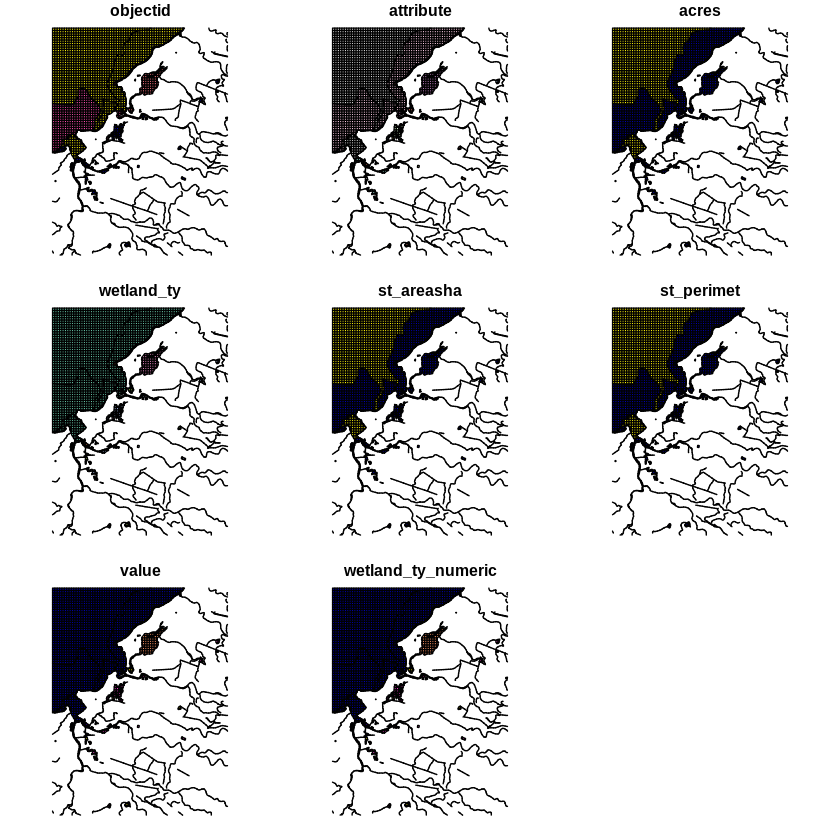

In [377]:
haleiwa_crop_nwi_to_fishnet$wetland_ty_numeric %>% plot
# st_write(haleiwa_crop_nwi_to_fishnet, "/content/export/nwi/utm4/2018/haleiwa_crop_nwi_to_fishnet.gpkg", driver = "GPKG")

In [384]:

haleiwa_nwi_nlcd <- rasterize(haleiwa_crop_nwi_to_fishnet, haleiwa_nlcd_resampled, field="wetland_ty_numeric")

In [392]:
names(haleiwa_nwi_nlcd) <- "nwi"

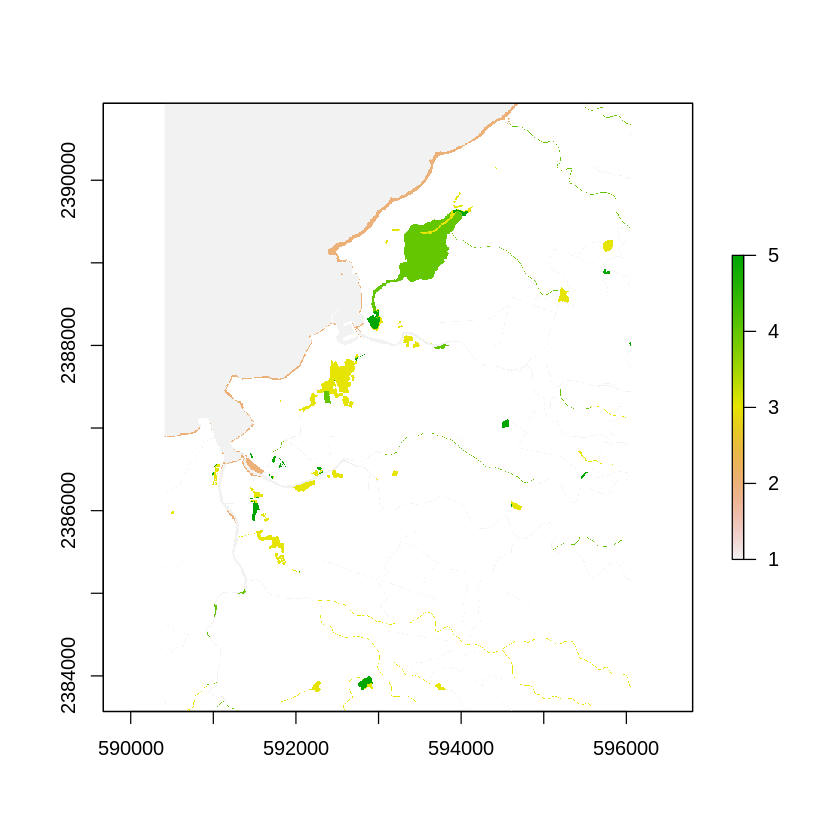

In [402]:
haleiwa_nwi_nlcd$nwi %>% plot

In [403]:
combined_haleiwa_nwi_nlcd <- cover(haleiwa_nwi_nlcd, haleiwa_nlcd_resampled)
haleiwa_stack_dem_ccap_nlcd_nwi <- addLayer(haleiwa_stack_dem_ccap_nlcd, combined_haleiwa_nwi_nlcd)


In [ ]:
haleiwa_stack_dem_ccap_nlcd_nwi %>% summary

In [409]:
writeRaster(haleiwa_stack_dem_ccap_nlcd_nwi, "/content/export/stack/utm4/haleiwa_stack_dem_ccap_nlcd_nwi.tif")

In [410]:
# https://drive.google.com/drive/folders/1Dy2emDlFhtOc_EizZoLLnt8TKj9XUVHQ?usp=drive_link
# save to exports - haleiwa
drive_upload(media = "/content/export/stack/utm4/haleiwa_stack_dem_ccap_nlcd_nwi.tif", path = as_id("1Dy2emDlFhtOc_EizZoLLnt8TKj9XUVHQ"))

drive_upload(media = "/content/export/stack/utm4/haleiwa_stack_dem_ccap_nlcd.tif", path = as_id("1Dy2emDlFhtOc_EizZoLLnt8TKj9XUVHQ"))



Local file:

• /content/export/stack/utm4/haleiwa_stack_dem_ccap_nlcd_nwi.tif

Uploaded into Drive file:

• haleiwa_stack_dem_ccap_nlcd_nwi.tif <id: 1DIdDGkWijkZHRBjQMEhu-kcZz2xlLI_i>

With MIME type:

• image/tiff

Local file:

• /content/export/stack/utm4/haleiwa_stack_dem_ccap_nlcd.tif

Uploaded into Drive file:

• haleiwa_stack_dem_ccap_nlcd.tif <id: 1JT4feqtCd3iw2EGMci10ZEF2b51MovaW>

With MIME type:

• image/tiff



In [411]:
# write out the data tables and csv files

raster_stack <- stack("/content/export/stack/utm4/haleiwa_stack_dem_ccap_nlcd_nwi.tif")
values <- getValues(raster_stack)
df <- as.data.frame(values, stringsAsFactors = FALSE)
dt <- as.data.table(df)

# Extract coordinates
coords <- as.data.frame(xyFromCell(raster_stack, 1:ncell(raster_stack)))
# Combine coordinates with the data frame
df_with_coords <- cbind(coords, df)
# Or for a data table
dt_with_coords <- cbind(coords, dt)

# For data frames
write.csv(df_with_coords, "/content/export/stack/utm4/df_haleiwa_stack_dem_ccap_nlcd_nwi.csv", row.names = FALSE)
# For data tables
fwrite(dt_with_coords, "/content/export/stack/utm4/dt_haleiwa_stack_dem_ccap_nlcd_nwi.csv")


In [412]:
# save data table and csv files to drive
# https://drive.google.com/drive/folders/1nY4Y_SjOpcHoiW5yJ1c5rbYnY4N2xvUy?usp=drive_link
drive_upload(media = "/content/export/stack/utm4/df_haleiwa_stack_dem_ccap_nlcd_nwi.csv", path = as_id("1nY4Y_SjOpcHoiW5yJ1c5rbYnY4N2xvUy"))
drive_upload(media = "/content/export/stack/utm4/dt_haleiwa_stack_dem_ccap_nlcd_nwi.csv", path = as_id("1nY4Y_SjOpcHoiW5yJ1c5rbYnY4N2xvUy"))

Local file:

• /content/export/stack/utm4/df_haleiwa_stack_dem_ccap_nlcd_nwi.csv

Uploaded into Drive file:

• df_haleiwa_stack_dem_ccap_nlcd_nwi.csv
  <id: 12ZpLnvDf2oTjxajMAowi-hTijtY2dmer>

With MIME type:

• text/csv

Local file:

• /content/export/stack/utm4/dt_haleiwa_stack_dem_ccap_nlcd_nwi.csv

Uploaded into Drive file:

• dt_haleiwa_stack_dem_ccap_nlcd_nwi.csv
  <id: 1mM1HwGvsNvEHxzZH-E-LZfbUaJ1Wi6FG>

With MIME type:

• text/csv



# previous work

In [ ]:
# stack planet data by year.
dir.create("/content/planet_input")

In [ ]:
dir.create("/content/planet_input/lokoaka_kionakapahu_2018")

In [ ]:
# download planet data one by one for each aoi for each year (2018, 2019, and 2020)
# https://drive.google.com/file/d//view?usp=drive_link,
# https://drive.google.com/file/d//view?usp=drive_link,
# https://drive.google.com/file/d//view?usp=drive_link,
# https://drive.google.com/file/d//view?usp=drive_link,
# https://drive.google.com/file/d//view?usp=drive_link,
# https://drive.google.com/file/d//view?usp=drive_link

drive_download(file = as_id('19U7YFEoeO_vl9JqIdw06C-3PStZlCa4T'), path =  '/content/planet_input/lokoaka_kionakapahu_2018/01.tif', overwrite = TRUE)
drive_download(file = as_id('19GZwmpOrh8GiryPGAbnyMExuJhGcVQUd'), path =  '/content/planet_input/lokoaka_kionakapahu_2018/02.tif', overwrite = TRUE)
drive_download(file = as_id('19c2MnxXeigighWQthjrN2vBAmR9ruwnT'), path =  '/content/planet_input/lokoaka_kionakapahu_2018/03.tif', overwrite = TRUE)
drive_download(file = as_id('19DJ1fHfN0U9LR4wqIBgR2RaCvMTXqUbI'), path =  '/content/planet_input/lokoaka_kionakapahu_2018/04.tif', overwrite = TRUE)
drive_download(file = as_id('19QU_LyTZrju5N_wsXpBtE3Ee6zox2N96'), path =  '/content/planet_input/lokoaka_kionakapahu_2018/05.tif', overwrite = TRUE)
drive_download(file = as_id('19Pfg1C-9KhofJaUxLkafFgtxA-HMjfcY'), path =  '/content/planet_input/lokoaka_kionakapahu_2018/06.tif', overwrite = TRUE)


In [ ]:
lokoaka_kionakapahu_2018 <- stack(
  "/content/planet_input/lokoaka_kionakapahu_2018/01.tif",
  "/content/planet_input/lokoaka_kionakapahu_2018/02.tif",
  "/content/planet_input/lokoaka_kionakapahu_2018/03.tif",
  "/content/planet_input/lokoaka_kionakapahu_2018/04.tif",
  "/content/planet_input/lokoaka_kionakapahu_2018/05.tif",
  "/content/planet_input/lokoaka_kionakapahu_2018/06.tif"
)

In [ ]:
lokoaka_kionakapahu_2018%>% plot

In [ ]:
dir.create("/content/planet_output")

In [ ]:
# Assuming 'lokoaka_kionakapahu_2018' is your RasterStack
output_file_path <- '/content/planet_output/lokoaka_kionakapahu_2018.tif'

# Save the raster stack as a TIFF
writeRaster(lokoaka_kionakapahu_2018, filename = output_file_path, format = 'GTiff', overwrite = TRUE)

In [ ]:
# Assuming 'lokoaka_kionakapahu_2018' is your RasterStack
metadata <- data.frame(
  names = names(lokoaka_kionakapahu_2018),
  resolution_x = xres(lokoaka_kionakapahu_2018),
  resolution_y = yres(lokoaka_kionakapahu_2018),
  extent = as.vector(extent(lokoaka_kionakapahu_2018)),
  crs = projection(lokoaka_kionakapahu_2018)
)

# Save the metadata to a CSV file in your Google Drive path
csv_output_path <- '/content/planet_output/lokoaka_kionakapahu_2018_metadata.csv'
write.csv(metadata, csv_output_path, row.names = FALSE)

In [ ]:
dir.create("/content/planet_2019")

In [ ]:
# Assuming 'jp_folder' is your Google Drive folder ID
# planet hawaii 2019 link
# # https://drive.google.com/drive/folders/?usp=drive_link
jp_folder <- "1XcObigXcr0XD1EJOfP3iAUHErDvwXmhA"
folder_id <- drive_get(as_id(jp_folder))
print(folder_id)

# Find files in the folder
files <- drive_ls(folder_id)

# Loop through the files and download them into their respective directories
for (i in seq_along(files$name)) {
  # Extract the first part of the name before the first underscore
  file_name_parts <- str_split(files$name[i], pattern = "_", n = 2)
  folder_name <- file_name_parts[[1]][1]  # Take the first part of the split

  # Create the directory path
  dir_path <- paste0('/content/planet_2019/', folder_name)

  # Check if the directory exists, if not, create it
  if (!dir.exists(dir_path)) {
    dir.create(dir_path, recursive = TRUE)
  }

  # Define the download path including the directory
  download_path <- file.path(dir_path, files$name[i])

  # Download the file into the specified directory
  try({
    drive_download(as_id(files$id[i]), path = download_path)
  }, silent = TRUE) # Using silent = TRUE to suppress warnings in case of errors
}

In [ ]:
lokoaka_kionakapahu_2019 <- stack(
  "/content/planet_2019/lokoaka/lokoaka_kionakapahu_2019-01-24.tif",
  "/content/planet_2019/lokoaka/lokoaka_kionakapahu_2019-02-16.tif",
  "/content/planet_2019/lokoaka/lokoaka_kionakapahu_2019-04-07.tif",
  "/content/planet_2019/lokoaka/lokoaka_kionakapahu_2019-05-10.tif"
)

In [ ]:
# Define the directory containing your TIFF files
tiff_directory <- "/content/planet_2019/lokoaka/"

# Get a list of all TIFF files in the directory
tiff_files <- list.files(path = tiff_directory, pattern = "\\.tif$", full.names = TRUE)

# Stack all TIFF files
lokoaka_kionakapahu_2019 <- stack(tiff_files)


In [ ]:
lokoaka_kionakapahu_2019

In [ ]:
lokoaka_kionakapahu_2019%>% plot

In [ ]:
# Define the directory containing your TIFF files
tiff_directory <- "/content/planet_2019/pololu/"

# Get a list of all TIFF files in the directory
tiff_files <- list.files(path = tiff_directory, pattern = "\\.tif$", full.names = TRUE)

# Stack all TIFF files
pololu_2019 <- stack(tiff_files)


In [ ]:
st_crs(pololu_2019)

In [ ]:
# output_file_path <- '/content/planet_output/lokoaka_kionakapahu_2019.tif'

# writeRaster(lokoaka_kionakapahu_2019, filename = output_file_path, format = 'GTiff', overwrite = TRUE)

# metadata <- data.frame(
#   names = names(lokoaka_kionakapahu_2019),
#   resolution_x = xres(lokoaka_kionakapahu_2019),
#   resolution_y = yres(lokoaka_kionakapahu_2019),
#   extent = as.vector(extent(lokoaka_kionakapahu_2019)),
#   crs = projection(lokoaka_kionakapahu_2019)
# )

# # Save the metadata to a CSV file in your Google Drive path
# csv_output_path <- '/content/planet_output/lokoaka_kionakapahu_2019_metadata.csv'
# write.csv(metadata, csv_output_path, row.names = FALSE)

In [ ]:
# # save stacked files to drive
# # https://drive.google.com/drive/folders/1wcc5PdfUOzsWyrGywUamY3m--44OJl16?usp=drive_link planet_hawaii folder
# drive_upload(media = "/content/planet_output/waipio_2018_metadata.csv", path = as_id("1wcc5PdfUOzsWyrGywUamY3m--44OJl16"))

tbd

In [ ]:
dir.create('input_data')

In [ ]:
# what is this? it's in the "nwi_hawaii" folder, but it's name is "naip tile index hawaii..."
# https://drive.google.com/file/d/1vwocGJQjyrHXp27GN4wo-TgUJVWNkpeW/view?usp=drive_link
drive_download(file = as_id("1vwocGJQjyrHXp27GN4wo-TgUJVWNkpeW"),
path = "/content/input_data/hawaii_naip_tileindex.gpkg", overwrite = FALSE)
hawaii_naip_tileindex = st_read("/content/input_data/hawaii_naip_tileindex.gpkg")
hawaii_naip_tileindex

# if this is a tile index for just hawaii island, rename it and read it for the code below = NAIP tile index
# I need this to tell me which naip data tiles to download from NOAA. they need to overlap with the
# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link (AOI Wetlands hawaii island)

In [ ]:
# AOI wetland shapefiles for Hawaii Island
# download, name it.
# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link
drive_download(file = as_id("1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc"),
path = "/content/input_data/hawaii_aoi_wetlands.gpkg", overwrite = FALSE)
hawaii_aoi_wetlands = st_read("/content/input_data/hawaii_aoi_wetlands.gpkg")
hawaii_aoi_wetlands

In [ ]:
hawaii_aoi_wetlands = st_read("/content/input_data/hawaii_aoi_wetlands.gpkg")
hawaii_aoi_wetlands

In [ ]:
# check the crs of hawaii_naip_tileindex and hawaii_aoi_wetlands
st_crs(hawaii_aoi_wetlands) #   User input: WGS 84 / UTM zone 5N

In [ ]:
st_crs(hawaii_naip_tileindex) #  User input: WGS 84 / UTM zone 5N

In [ ]:
# Transform CRS of the entire wetlands dataset to match hawaii_naip
# wetlands_transformed <- st_transform(wetlands_gpkg, st_crs(hawaii_naip))

In [ ]:
#

In [ ]:
# Find the naip .tif files that overlap with Hawaii Island AOI wetland shapefile
overlap_bw_naip_aoi <- hawaii_naip_tileindex %>% st_intersection(hawaii_aoi_wetlands)

In [ ]:
# How many unique naip .tif files exist that overlap with Hawaii Island AOIs (there's 4 aois)
overlap_bw_naip_aoi %>% unique %>% length

In [ ]:
# what does the overlap data table look like?
overlap_bw_naip_aoi[,] %>% data.table()

In [ ]:
class(overlap_bw_naip_aoi)
class(hawaii_naip_tileindex)
class(hawaii_aoi_wetlands)

In [ ]:
# Make a cluster so that it's faster
# Download the unique number of naip .tif files from the NOAA website and save to a local folder

# dir.create("/content/hawaii_naip_tiles")

# cl <- makeCluster(8)


# 1:nrow(overlap_bw_naip_aoi) %>%
#   parLapply(cl,.,function(x,overlap_bw_naip_aoi){
#   x_dt <- overlap_bw_naip_aoi[x,]
#   download.file(x_dt$url, paste0('/content/hawaii_naip_tiles/',x_dt$location,sep='') )
#   },overlap_bw_naip_aoi)


# stopCluster(cl)

In [ ]:
# Quick, before you forget and close the tab - zip the naip .tif files
# Upload the zip folder to google drive
# https://drive.google.com/drive/folders/1HsO3kKpawRzhrkzJfuOJU0WZNzIE91CK?usp=drive_link

# # zip(zipfile = 'testZip', files = 'testDir/test.csv') #make this work
# zip(zipfile = "/content/hawaii_naip_tiles.zip",
#     files = c("/content/hawaii_naip_tiles"))

# drive_upload(media = "/content/hawaii_naip_tiles.zip", path = as_id("1HsO3kKpawRzhrkzJfuOJU0WZNzIE91CK"))


In [ ]:
# lokoaka_kionakapahu_2018
# lokoaka_kionakapahu_2019

# pololu_2018
# pololu_2019

# waimanu_2018

# waipio_2018


In [ ]:
# Add the DEM (tif), CCAP(tif), NCLD(tif), and NWI(gpkg)
# clip each of these to each of the naip tiles...?

In [ ]:
dir.create("/content/dem")

In [ ]:


# DEM (tif) for Hawaii Island
# https://drive.google.com/file/d/1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft/view?usp=drive_link
drive_download(file = as_id("1YVeXmyBKJdxvY1-msKWw1zSEtsqHYhft"),
path = "/content/dem/hawaii_10m.tif", overwrite = TRUE)

In [ ]:
dem_raster <- raster("/content/dem/hawaii_10m.tif")

In [ ]:
dem_raster

In [ ]:
dem_raster%>% plot

In [ ]:
dem_gpkg <-
"/content/dem" %>%
  list.files(pattern='*.tif', full.names = T) %>%
  # lapply(stack) %>%
  # lapply(extent) %>%
  lapply(function(x){
    x_tif <- x %>% stack
    x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
    x_gpkg$path <- x
    st_crs(x_gpkg) <- st_crs(x_tif)
    x_gpkg %>% data.table %>% return
    }) %>%
  rbindlist()

In [ ]:
dir.create("/content/output")

In [ ]:
# Assuming 'lokoaka_kionakapahu_2018' is your RasterStack
output_file_path <- '/content/output/'

# Save the raster stack as a TIFF
writeRaster(dem_raster, filename = output_file_path, format = 'GTiff', overwrite = TRUE)

In [ ]:
# dem_raster_crs <- rast()
crs(dem_raster)
crs(dem_raster) <- "epsg:32605"

In [ ]:
st_write("")

In [ ]:
extent(lokoaka_kionakapahu_2018)

In [ ]:
extent(dem_raster) #  User input: +proj=utm +zone=5 +datum=WGS84 +units=m +no_defs

In [ ]:
# library(raster)

# Load the DEM raster
dem_raster <- raster("/content/dem/hawaii_10m.tif")

# Load the RasterStack to match the CRS
lokoaka_kionakapahu_2018 <- stack("/content/planet_output/lokoaka_kionakapahu_2018.tif")

# Reproject the DEM raster to match the CRS of the RasterStack
dem_raster_projected <- projectRaster(dem_raster, crs=crs(lokoaka_kionakapahu_2018))


In [ ]:
# Get the extent of the RasterStack
raster_stack_extent <- extent(lokoaka_kionakapahu_2018)

# Clip the reprojected DEM to the extent of the RasterStack
dem_clipped <- crop(dem_raster_projected, raster_stack_extent)

# Save the clipped DEM to a new file
output_file_path <- "/content/clipping/2018/lokoaka_kionakapahu_2018_dem_clipped.tif"
writeRaster(dem_clipped, filename=output_file_path, format="GTiff", overwrite=TRUE)


In [ ]:
extent(dem_clipped)

In [ ]:
dem_raster %>% plot

In [ ]:
dem_clipped %>% plot

In [ ]:
lokoaka_kionakapahu_2018 %>% plot

tbd


In [ ]:
dir.create("/content/ccap")

In [ ]:
# CCAP (tif) for Hawaii Island
# https://drive.google.com/drive/folders/1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW?usp=drive_link
jp_folder = "1CdwnqAx3xxZ-y1ppEktXHh78MdXN8TYW"
folder_id = drive_get(as_id(jp_folder))
print(folder_id)
#find files in folder
files = drive_ls(folder_id)

#loop dirs and download files inside them
for (i in seq_along(files$name)) {

  i_dir <- files[i, ]
    try({
      drive_download(
        as_id(i_dir$id[1]),
        path = paste0('/content/ccap/', i_dir$name[1])
      )
    })
  }

In [ ]:
hawaii_ccap_2010_01 <- raster("/content/ccap/hawaii_ccap_2010_01.tif")
hawaii_ccap_2010_01 %>% plot

In [ ]:
hawaii_ccap_2010_02 <- raster("/content/ccap/hawaii_ccap_2010_02.tif")
hawaii_ccap_2010_02 %>% plot

In [ ]:
hawaii_ccap_2010_03 <- raster("/content/ccap/hawaii_ccap_2010_03.tif")
hawaii_ccap_2010_03 %>% plot

In [ ]:
dir.create("/content/nlcd")

In [ ]:
# Add NLCD for Hawaii Island
# https://drive.google.com/file/d/155LX_Gle2Pdm1pJ19po5J-PJEjFlC0oT/view?usp=drive_link
drive_download(file =as_id("155LX_Gle2Pdm1pJ19po5J-PJEjFlC0oT"),
path = "/content/nlcd/hawaii_nlcd.tif")


In [ ]:
hawaii_nlcd <-stack("/content/nlcd/hawaii_nlcd.tif")

In [ ]:
hawaii_nlcd %>% plot

In [ ]:
dir.create("/content/nwi")

In [ ]:
# Add the NWI wetlands areas for Hawaii Island
# https://drive.google.com/file/d/1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc/view?usp=drive_link
drive_download(file = as_id("1klsckpbR73H4-2lj4Pi_4cyvQlU6dFbc"),
path = "/content/nwi/hawaii_nwi.gpkg",
overwrite = TRUE)
hawaii_nwi = st_read("/content/nwi/hawaii_nwi.gpkg")

In [ ]:
hawaii_nwi$layer

In [ ]:
st_crs(hawaii_nlcd)

In [ ]:
st_crs(dem)

In [ ]:
m_1915524_ne_05_060_20221225 <- stack("/content/hawaii_naip_tiles/m_1915524_ne_05_060_20221225.tif")

In [ ]:
m_1915524_ne_05_060_20221225 %>% plot

In [ ]:
m_1915524_ne_05_060_20221225

In [ ]:
dir.create("/content/output_data")

In [ ]:
# trying to do this a different way

# Load the main TIF files
hawaii_10m <- raster("/content/dem/hawaii_10m.tif")
hawaii_ccap_01 <- raster("/content/ccap/hawaii_ccap_2010_01.tif")
hawaii_ccap_02 <- raster("/content/ccap/hawaii_ccap_2010_02.tif")
hawaii_ccap_03 <- raster("/content/ccap/hawaii_ccap_2010_03.tif")
hawaii_nlcd <- raster("/content/nlcd/hawaii_nlcd.tif")

In [ ]:
# List all the NAIP tile files
naip_tiles_paths <- list.files(path = "hawaii_naip_tiles", pattern = "m_.*.tif", full.names = TRUE)

In [ ]:
naip_tile_raster <- raster(naip_tile_path)

In [ ]:

# dem_gpkg <-
# "/content/HI_DEM" %>%
#   list.files(pattern='*.tif', full.names = T) %>%
#   # lapply(stack) %>%
#   # lapply(extent) %>%
#   lapply(function(x){
#     x_tif <- x %>% stack
#     x_gpkg <- x_tif %>% extent %>% as('SpatialPolygons') %>% st_as_sf(crs = st_crs(x_tif))
#     x_gpkg$path <- x
#     st_crs(x_gpkg) <- st_crs(x_tif)
#     x_gpkg %>% data.table %>% return
#     }) %>%
#   rbindlist()


dem_clipped_sf <- dem_clipped %>% as("SpatialPolygons")

In [ ]:
class(dem_clipped_sf)

In [ ]:
lokoaka_kionakapahu_2018_sf <- lokoaka_kionakapahu_2018 %>% as("SpatialPolygons")

In [ ]:
class(lokoaka_kionakapahu_2018_sf)

In [ ]:

tbd <- dem_clipped_sf  %>% st_make_grid(cellsize = c(76.8,76.8))

In [ ]:
class(tbd)
tbd %>% plot

In [ ]:
st_write(tbd,("/content/fishnet_oputput/"))

In [ ]:
# # https://drive.google.com/file/d//view?usp=drive_link
drive_download(file = as_id("12JyZ5Alpk36Jdt9sym23cJPydg6Ro8IA"),
path = "/content/01_workingFolder/waipio.gpkg", overwrite = FALSE)

In [ ]:
lokoaka_fishnet_gpkg <- st_read("/content/01_workingFolder/lokoaka_kionakapahu.gpkg")

In [ ]:
st_crs(lokoaka_fishnet_gpkg)